In [1]:
import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web
from scipy.stats import norm
start = datetime.datetime(2018, 1, 1)
import yfinance as yf
import cufflinks as cf
cf.go_offline()
ticker = 'MANALIPETC.NS'
bse = '^BSESN'


In [2]:
tickers = [ticker, bse]
data = pd.DataFrame()
for t in tickers:
    data[t] = yf.download(t,period="4y")['Adj Close']   
sec_returns = np.log( data / data.shift(1) )
cov = sec_returns.cov() * 250
cov_with_market = cov.iloc[0,1]
market_var = sec_returns[bse].var() * 250
MSFT_beta = cov_with_market / market_var
MSFT_beta

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


0.8966308072597629

In [3]:
MSFT_er = .05 + MSFT_beta * 0.06
print("\n the expected return is :", MSFT_er*100)


 the expected return is : 10.379784843558577


In [4]:
Sharpe = (MSFT_er - 0.025) / (sec_returns[ticker].std() * 250 ** 0.5)
Sharpe

0.15172682618713448

In [5]:
returns = np.log(data / data.shift(1))
vols = returns.std() * 250 ** 0.5 *100
vols

MANALIPETC.NS    51.934025
^BSESN           21.246618
dtype: float64

In [6]:
annual_returns = returns.mean() * 250 * 100
annual_returns

MANALIPETC.NS    25.009262
^BSESN            9.207817
dtype: float64

In [7]:
sharpe_ratio = annual_returns[ticker]/vols[ticker]
sharpe_ratio

0.4815583260752261

In [8]:
(vols/annual_returns)*100

MANALIPETC.NS    207.659165
^BSESN           230.745447
dtype: float64

In [9]:
start = datetime.datetime(2017, 1, 1)
df =  yf.download(ticker,period="4y")
df.to_csv('manali.csv')

[*********************100%***********************]  1 of 1 completed


In [10]:
df

Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2019-03-18  27.250000  27.700001  26.500000  26.650000  23.029305  538790
2019-03-19  27.150000  27.250000  26.500000  26.799999  23.158926  160740
2019-03-20  26.700001  26.900000  26.450001  26.549999  22.942892  138569
2019-03-22  26.850000  27.250000  25.900000  26.000000  22.467615  311891
2019-03-25  25.850000  26.000000  25.250000  25.400000  21.949135  150886
...               ...        ...        ...        ...        ...     ...
2023-03-13  68.949997  69.099998  67.300003  67.500000  67.500000  315906
2023-03-14  67.900002  67.900002  65.550003  65.900002  65.900002  258744
2023-03-15  66.449997  66.750000  64.000000  65.000000  65.000000  287334
2023-03-16  69.400002  69.400002  61.549999  61.750000  61.750000  859952
2023-03-17  62.099998  62.799999  61.500000  61.849998  61.849998  173849

[991 rows x 6 columns]

In [11]:
def CAGR(DF):
    "function to calculate the Cumulative Annual Growth Rate of a trading strategy"
    df = DF.copy()
    df["daily_ret"] = DF["Adj Close"].pct_change()
    df["cum_return"] = (1 + df["daily_ret"]).cumprod()
    n = len(df)/252
    CAGR = (df["cum_return"][-1])**(1/n) - 1
    return CAGR
def volatility(DF):
    "function to calculate annualized volatility of a trading strategy"
    df = DF.copy()
    df["daily_ret"] = DF["Adj Close"].pct_change()
    vol = df["daily_ret"].std() * np.sqrt(252)
    return vol

def sharpe(DF,rf):
    "function to calculate sharpe ratio ; rf is the risk free rate"
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr
    
def sortino(DF,rf):
    "function to calculate sortino ratio ; rf is the risk free rate"
    df = DF.copy()
    df["daily_ret"] = DF["Adj Close"].pct_change()
    neg_vol = df[df["daily_ret"]<0]["daily_ret"].std() * np.sqrt(252)
    sr = (CAGR(df) - rf)/neg_vol
    return sr

def max_dd(DF):
    "function to calculate max drawdown"
    df = DF.copy()
    df["daily_ret"] = DF["Adj Close"].pct_change()
    df["cum_return"] = (1 + df["daily_ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd
    
def calmar(DF):
    "function to calculate calmar ratio"
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



In [12]:
cg = CAGR(df)
vola = volatility(df)
shar = sharpe(df,0.06)
sor = sortino(df,0.06)
md = max_dd(df)
calm = calmar(df)

print("\n The Compunded Annual Groth of the stock is {}%".format(cg*100))
print("\n The Volatility of the stock is  {}%".format(vola*100))
print("\n The Sharp Ratio is: {}".format(shar))
print("\n The Sortino Ratio is: {}".format(sor))
print("\n The MAX Draw Down it shows loss for the investment {}%".format(md*100))
print("\n The Calamr Ratio is(It shows the Risk Adjusted Return) : {}".format(calm))


 The Compunded Annual Groth of the stock is 28.559678740956972%

 The Volatility of the stock is  52.99835957571227%

 The Sharp Ratio is: 0.42566749087259426

 The Sortino Ratio is: 0.7622847845558177

 The MAX Draw Down it shows loss for the investment 64.89316151347536%

 The Calamr Ratio is(It shows the Risk Adjusted Return) : 0.4401030566992244


In [13]:
data = pd.DataFrame()
data[ticker] = yf.download(ticker,period="4y")['Adj Close']

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

drift.values
stdev.values

t_intervals = 250
iterations = 1000

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

[*********************100%***********************]  1 of 1 completed


In [14]:
S0 = data.iloc[-1]
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
print("The MAXIMUM PRICE OBTAINED FROM MONTE CARLO SIMULATION IS:",price_list.max())
print(" The MINIMUM PRICE OBTAINED FROM MONTE CARLO SIMULATION IS:",price_list.min())
print(" The MEAN PRICE OBTAINED FROM MONTE CARLO SIMULATION IS:",price_list.mean())

The MAXIMUM PRICE OBTAINED FROM MONTE CARLO SIMULATION IS: 339.13083258618695
 The MINIMUM PRICE OBTAINED FROM MONTE CARLO SIMULATION IS: 14.663669637752777
 The MEAN PRICE OBTAINED FROM MONTE CARLO SIMULATION IS: 70.08725745199521


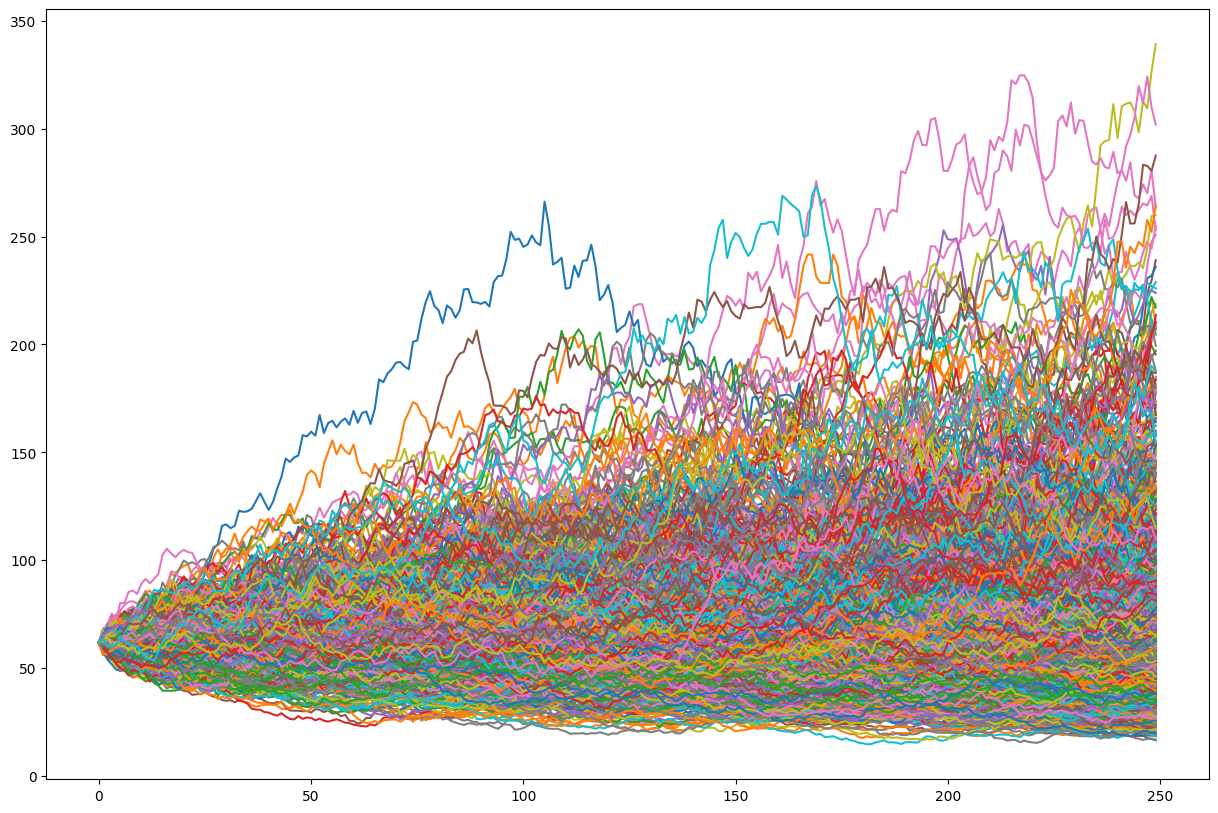

In [15]:
plt.figure(figsize=(15,10))
plt.plot(price_list);

In [16]:
print("Expected price: ", round(np.mean(price_list),2))
print("Quantile (5%): ",np.percentile(price_list,5))
print("Quantile (95%): ",np.percentile(price_list,95))

Expected price:  70.09
Quantile (5%):  36.106785262207936
Quantile (95%):  123.54137148326011


In [17]:
price_list

array([[ 61.79999924,  61.79999924,  61.79999924, ...,  61.79999924,
         61.79999924,  61.79999924],
       [ 62.76531478,  61.24879655,  61.71552341, ...,  60.70913535,
         62.65624786,  63.59665786],
       [ 60.72391775,  63.26986924,  61.34099189, ...,  60.83737579,
         64.08558422,  60.08340925],
       ...,
       [165.97577654,  41.2744005 ,  25.95636809, ..., 141.22358685,
         52.82349518, 184.09449955],
       [168.73407586,  41.22252944,  24.94864104, ..., 141.92235583,
         52.61185143, 190.05430828],
       [167.44760528,  41.14239559,  23.93362336, ..., 139.95890249,
         53.23970967, 187.48113088]])

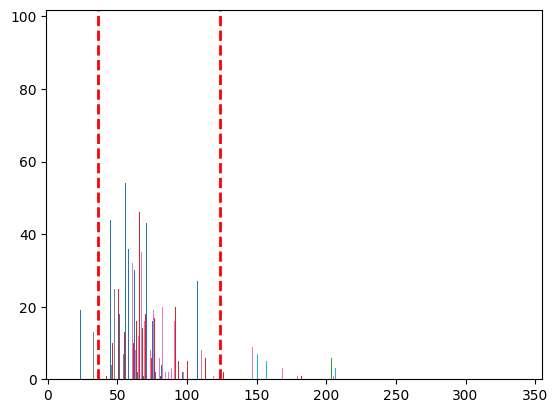

In [18]:

plt.hist(price_list,bins=100)
plt.axvline(np.percentile(price_list,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(price_list,95), color='r', linestyle='dashed', linewidth=2)
plt.show()

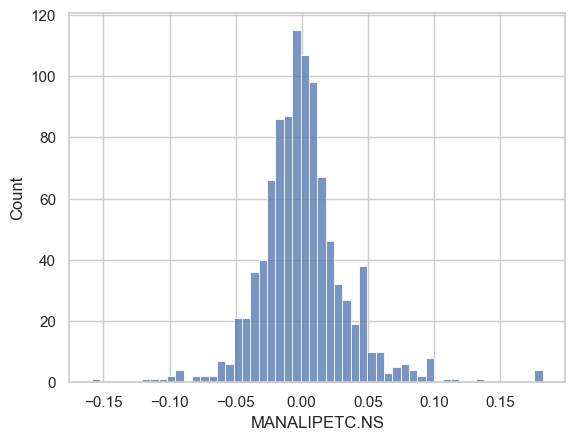

<Figure size 1500x1000 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
a = returns['MANALIPETC.NS']
sns.histplot(x=a)
plt.figure(figsize=(15,10))
plt.show()

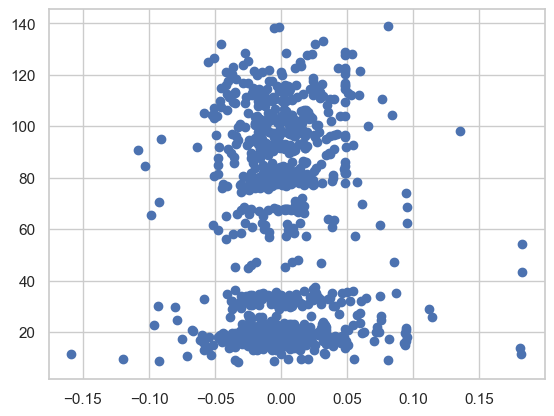

In [20]:
plt.scatter(returns['MANALIPETC.NS'],df['Adj Close'])

In [21]:
ab1 = np.array(returns[ticker][1:])
print("Expected price: ", round(np.mean(ab1),2)*100)
print("Quantile (5%): ",np.percentile(ab1,5)*100)
print("Quantile (95%): ",np.percentile(ab1,95)*100)

Expected price:  0.0
Quantile (5%):  -4.518954544501325
Quantile (95%):  5.320147886081174


In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df = pd.read_csv("manali.csv", index_col = False)
#df.set_index('Date', inplace=True)
df['Date'] = df['Date'].apply(pd.to_datetime)
df.set_index('Date', inplace=True)
df =df.resample(rule='M').mean()
df =df.dropna()
len(df)

49

<AxesSubplot:xlabel='Date'>

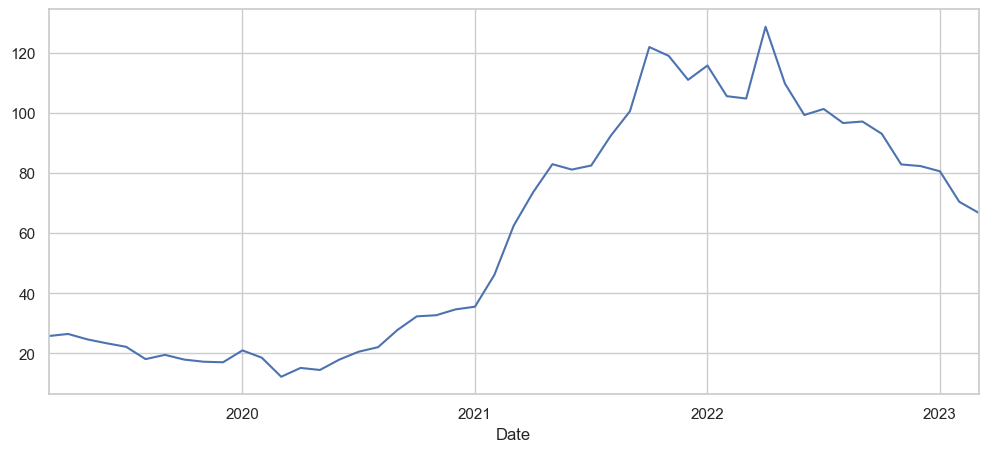

In [23]:
df['Close'].plot(figsize=(12,5))

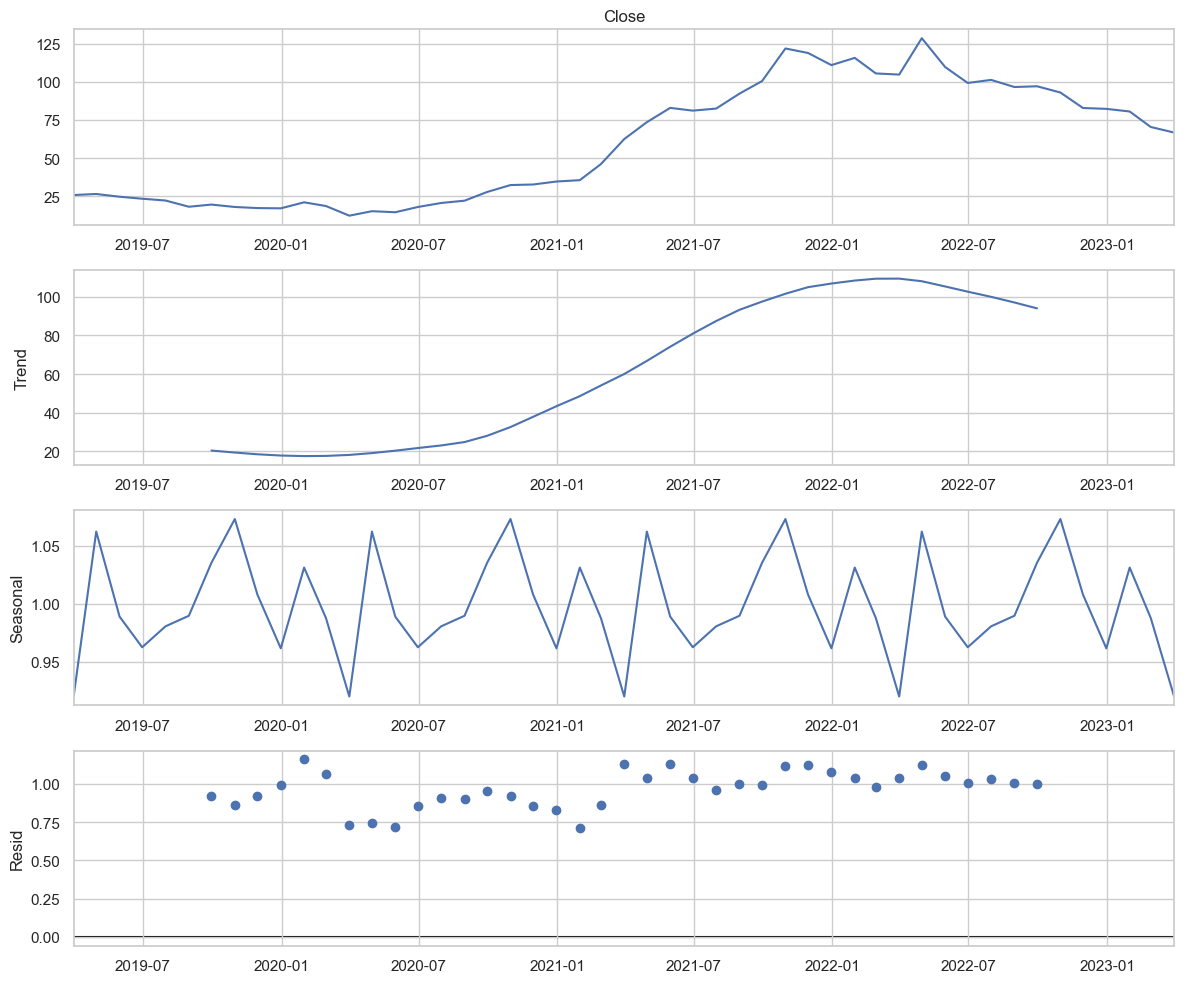

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 12,10

result = seasonal_decompose(df['Close'], model='mul')  # model='mul' also works
result.plot();

In [25]:
start = datetime.datetime(2016, 1, 1)



dfnew = yf.download(ticker,period="4y")
dfnew['200DMA'] = dfnew['Close'].rolling(window=360).mean()
dfnew['Diff'] = ((dfnew['Close']- dfnew['200DMA'])/dfnew['Close'])*100
dfnew.tail()

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2023-03-13  68.949997  69.099998  67.300003  67.500000  67.500000  315906   
2023-03-14  67.900002  67.900002  65.550003  65.900002  65.900002  258744   
2023-03-15  66.449997  66.750000  64.000000  65.000000  65.000000  287334   
2023-03-16  69.400002  69.400002  61.549999  61.750000  61.750000  859952   
2023-03-17  62.099998  62.799999  61.500000  61.950001  61.950001  175292   

                200DMA       Diff  
Date                               
2023-03-13  100.246389 -48.513169  
2023-03-14  100.080000 -51.866461  
2023-03-15   99.893750 -53.682692  
2023-03-16   99.686667 -61.435897  
2023-03-17   99.499028 -60.611826

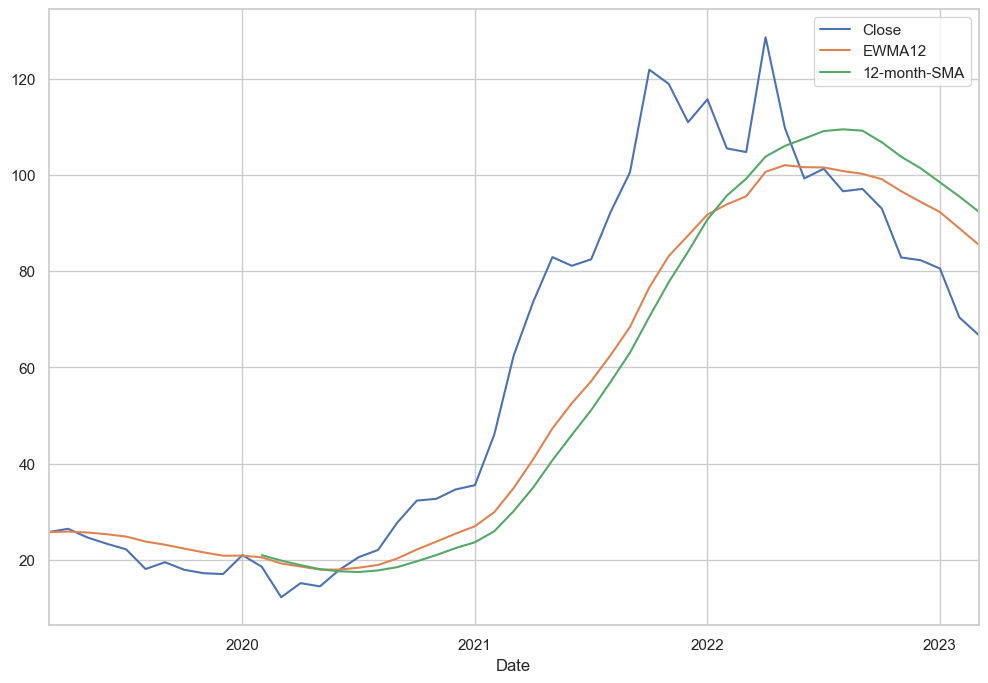

In [26]:
df['EWMA12'] = df['Close'].ewm(span=12,adjust=False).mean()
df['12-month-SMA'] = df['Close'].rolling(window=12).mean()
df[['Close','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

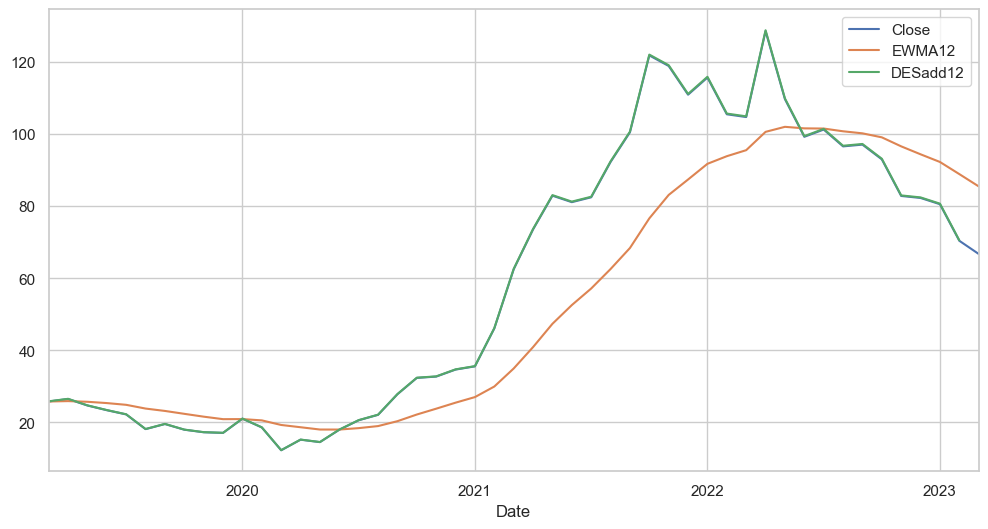

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Close'], trend='mul').fit().fittedvalues.shift(-1)
df[['Close','EWMA12','DESadd12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [28]:
df['TESadd12'] = ExponentialSmoothing(df['Close'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df['TESmul12'] = ExponentialSmoothing(df['Close'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

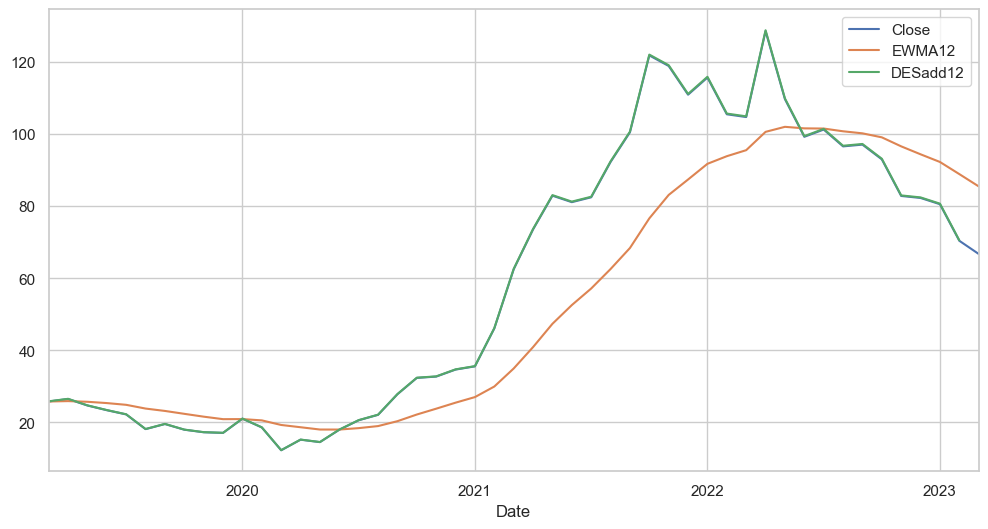

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Close'], trend='mul').fit().fittedvalues.shift(-1)
df[['Close','EWMA12','DESadd12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

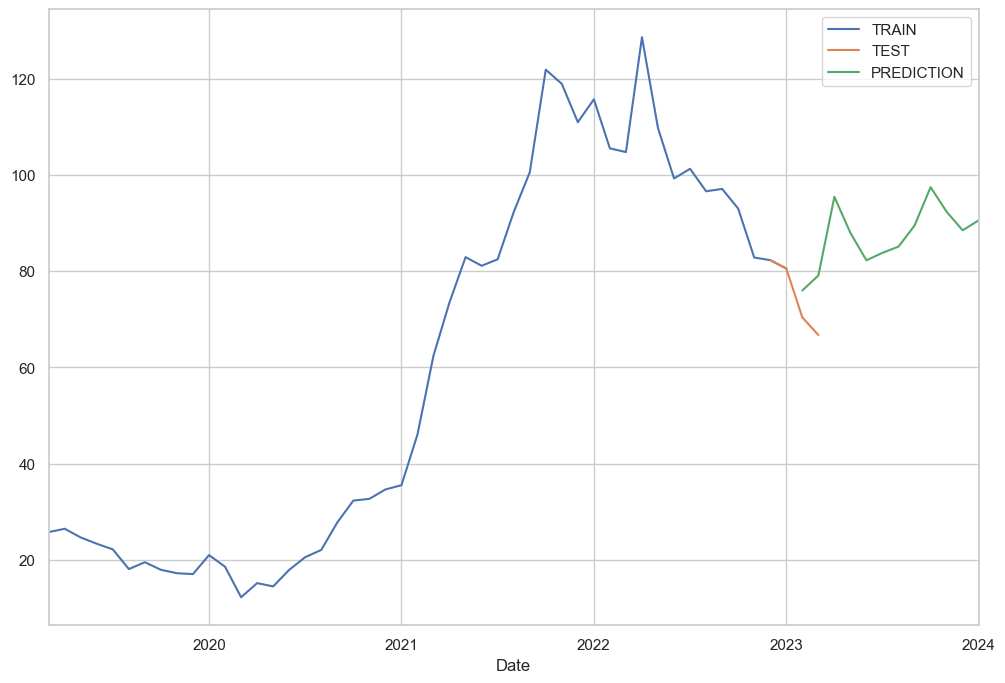

In [34]:
df['TESadd12'] = ExponentialSmoothing(df['Close'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df['TESmul12'] = ExponentialSmoothing(df['Close'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
train_data = df.iloc[:47] #oes up to but not including 108
test_data = df.iloc[45:]
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Close'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(12).rename('HW Forecast')
test_predictions
train_data['Close'].plot(legend=True,label='TRAIN')
test_data['Close'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

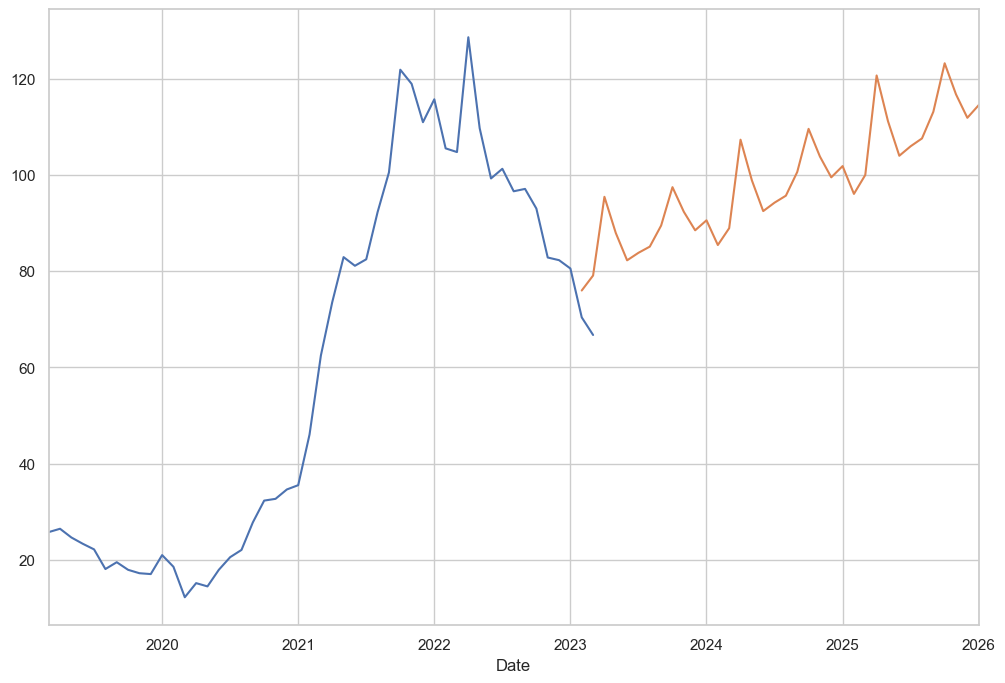

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
final_model = ExponentialSmoothing(df['Close'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
forecast_predictions = fitted_model.forecast(36).rename('HW Forecast')
df['Close'].plot(figsize=(12,8))
forecast_predictions.plot();

In [36]:
forecast_predictions

2023-02-28     75.995082
2023-03-31     79.109562
2023-04-30     95.470734
2023-05-31     87.963488
2023-06-30     82.267063
2023-07-31     83.829289
2023-08-31     85.115718
2023-09-30     89.495452
2023-10-31     97.473611
2023-11-30     92.359505
2023-12-31     88.507834
2024-01-31     90.586967
2024-02-29     85.446802
2024-03-31     88.948639
2024-04-30    107.344696
2024-05-31     98.903752
2024-06-30     92.498847
2024-07-31     94.255371
2024-08-31     95.701797
2024-09-30    100.626250
2024-10-31    109.596675
2024-11-30    103.846514
2024-12-31     99.515801
2025-01-31    101.853521
2025-02-28     96.074059
2025-03-31    100.011429
2025-04-30    120.695455
2025-05-31    111.204687
2025-06-30    104.003187
2025-07-31    105.978175
2025-08-31    107.604496
2025-09-30    113.141418
2025-10-31    123.227520
2025-11-30    116.762195
2025-12-31    111.892858
2026-01-31    114.521327
Freq: M, Name: HW Forecast, dtype: float64

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.14761D+00    |proj g|=  1.22812D-01

At iterate    5    f=  3.13121D+00    |proj g|=  2.15174D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     13      1     0     0   1.709D-07   3.131D+00
  F =   3.1311778627915028     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


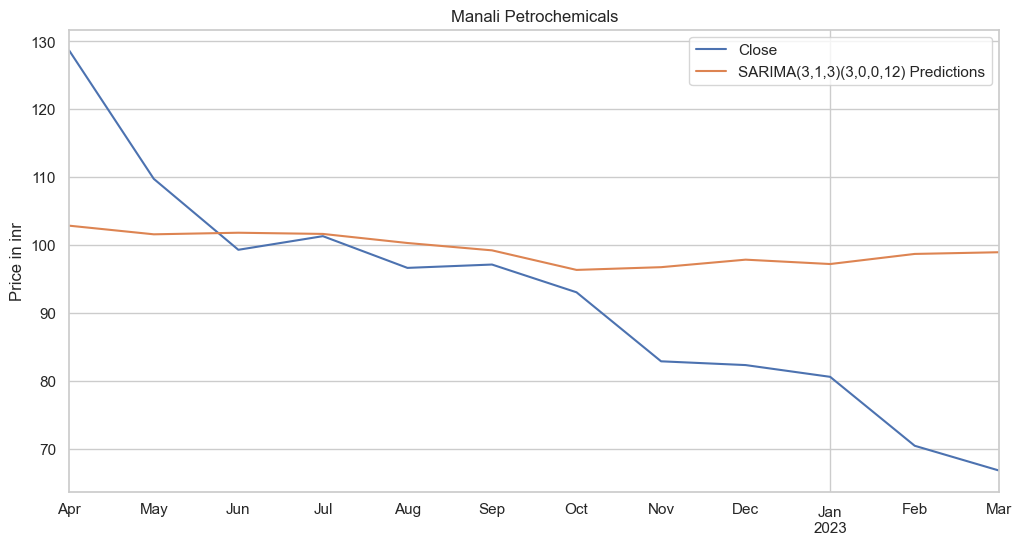

In [37]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
#from arima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("manali.csv", index_col = False)
#df.set_index('Date', inplace=True)
df['Date'] = df['Date'].apply(pd.to_datetime)
df.set_index('Date', inplace=True)
df =df.resample(rule='M').mean()
df.dropna(subset=['Close'], inplace=True)
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]
model = SARIMAX(train['Close'],order=(2,1,0),seasonal_order=(2,0,0,12))
results = model.fit()
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(3,1,3)(3,0,0,12) Predictions')

title='Manali Petrochemicals'
ylabel='Price in inr'
xlabel=''

ax = test['Close'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [38]:
model = SARIMAX(df['Close'],order=(0,1,0),seasonal_order=(2,0,0,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(0,1,0)(2,0,0,12) Forecast')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45257D+00    |proj g|=  9.98159D-02

At iterate    5    f=  3.39690D+00    |proj g|=  4.17814D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   1.175D-05   3.395D+00
  F =   3.3948896503434627     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


In [39]:
fcast

2023-04-30    65.856490
2023-05-31    64.514606
2023-06-30    64.561250
2023-07-31    64.438902
2023-08-31    63.260613
2023-09-30    62.336471
2023-10-31    59.862907
2023-11-30    60.042761
2023-12-31    60.934843
2024-01-31    60.371436
2024-02-29    61.371417
2024-03-31    61.403432
Freq: M, Name: SARIMA(0,1,0)(2,0,0,12) Forecast, dtype: float64

49

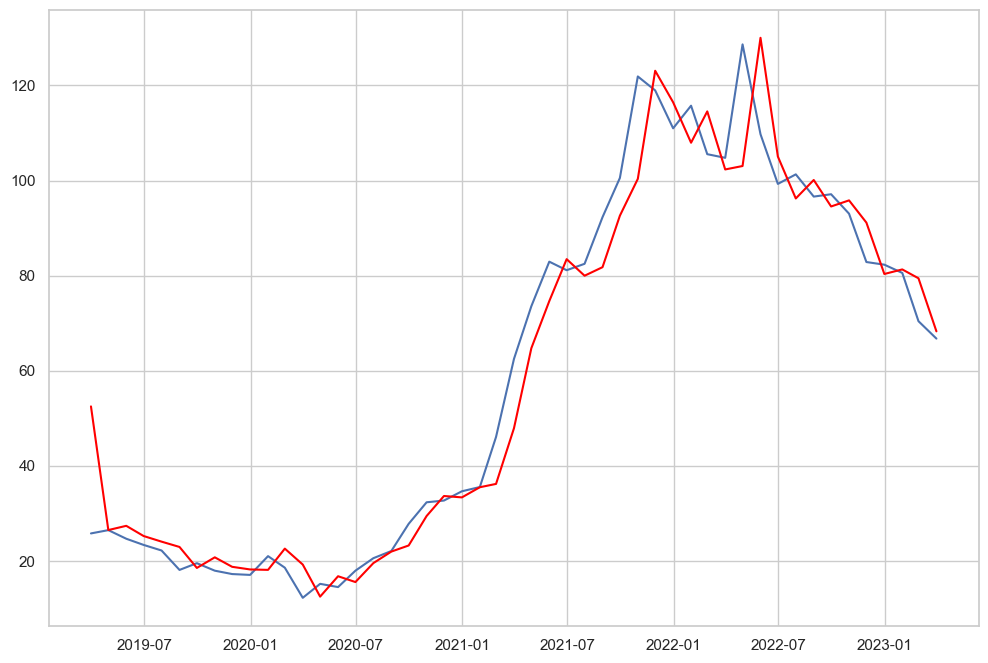

In [40]:
df = pd.read_csv("manali.csv", index_col = False)
#df.set_index('Date', inplace=True)
df['Date'] = df['Date'].apply(pd.to_datetime)
df.set_index('Date', inplace=True)
df =df.resample(rule='M').mean()
from statsmodels.tsa.arima.model import ARIMA
# For non-seasonal data
import statsmodels.api as sm
model = ARIMA(df['Close'], order=(2, 0, 0))  
results_AR = model.fit()
plt.figure(figsize=(12,8))
plt.plot(df['Close'])
plt.plot(results_AR.fittedvalues, color='red')
len(df)

In [41]:
fcast202 = results_AR.predict(start = 50, end = 62, dynamic = True )
fcast202

2023-05-31    65.181404
2023-06-30    64.705174
2023-07-31    64.256947
2023-08-31    63.826807
2023-09-30    63.412655
2023-10-31    63.013677
2023-11-30    62.629280
2023-12-31    62.258926
2024-01-31    61.902101
2024-02-29    61.558311
2024-03-31    61.227079
2024-04-30    60.907947
2024-05-31    60.600472
Freq: M, Name: predicted_mean, dtype: float64

In [42]:
import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web
from scipy.stats import norm

start = datetime.datetime(2017, 1, 1)



dft = yf.download(ticker,period="4y")
dft['200DMA'] = dft['Close'].rolling(window=200).mean()
dft['Diff'] = ((dft['Close']- dft['200DMA'])/dft['Close'])*100
dft['50DMA'] = dft['Close'].rolling(window=50).mean()
dft.tail()

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2023-03-13  68.949997  69.099998  67.300003  67.500000  67.500000  315906   
2023-03-14  67.900002  67.900002  65.550003  65.900002  65.900002  258744   
2023-03-15  66.449997  66.750000  64.000000  65.000000  65.000000  287334   
2023-03-16  69.400002  69.400002  61.549999  61.750000  61.750000  859952   
2023-03-17  62.099998  62.799999  61.500000  61.799999  61.799999  184781   

              200DMA       Diff   50DMA  
Date                                     
2023-03-13  88.70350 -31.412592  74.565  
2023-03-14  88.53250 -34.343699  74.250  
2023-03-15  88.37300 -35.958461  73.898  
2023-03-16  88.18825 -42.814980  73.479  
2023-03-17  87.99725 -42.390374  73.077

In [43]:
def MACD(DF,a,b,c):
    """function to calculate MACD
       typical values a = 12; b =26, c =9"""

    df = DF.copy()
    df["MA_Fast"]=df["Adj Close"].ewm(span=a,min_periods=a).mean()
    df["MA_Slow"]=df["Adj Close"].ewm(span=b,min_periods=b).mean()
    df["MACD"]=df["MA_Fast"]-df["MA_Slow"]
    df["Signal"]=df["MACD"].ewm(span=c,min_periods=c).mean()
    df.dropna(inplace=True)
    return df

# Visualization - plotting MACD/signal along with close price and volume for last 100 data points



# Visualization - Using object orient approach
# Get the figure and the axes

def ATR(DF,n):
    "function to calculate True Range and Average True Range"
    df = DF.copy()
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    #df['ATR'] = df['TR'].ewm(span=n,adjust=False,min_periods=n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df2


def BollBnd(DF,n):
    "function to calculate Bollinger Band"
    df = DF.copy()
    df["MA"] = df['Adj Close'].rolling(n).mean()
    df["BB_up"] = df["MA"] + 2*df['Adj Close'].rolling(n).std(ddof=0) #ddof=0 is required since we want to take the standard deviation of the population and not sample
    df["BB_dn"] = df["MA"] - 2*df['Adj Close'].rolling(n).std(ddof=0) #ddof=0 is required since we want to take the standard deviation of the population and not sample
    df["BB_width"] = df["BB_up"] - df["BB_dn"]
    df.dropna(inplace=True)
    return df



def RSI(DF,n):
    "function to calculate RSI"
    df = DF.copy()
    df['delta']=df['Adj Close'] - df['Adj Close'].shift(1)
    df['gain']=np.where(df['delta']>=0,df['delta'],0)
    df['loss']=np.where(df['delta']<0,abs(df['delta']),0)
    avg_gain = []
    avg_loss = []
    gain = df['gain'].tolist()
    loss = df['loss'].tolist()
    for i in range(len(df)):
        if i < n:
            avg_gain.append(np.NaN)
            avg_loss.append(np.NaN)
        elif i == n:
            avg_gain.append(df['gain'].rolling(n).mean().tolist()[n])
            avg_loss.append(df['loss'].rolling(n).mean().tolist()[n])
        elif i > n:
            avg_gain.append(((n-1)*avg_gain[i-1] + gain[i])/n)
            avg_loss.append(((n-1)*avg_loss[i-1] + loss[i])/n)
    df['avg_gain']=np.array(avg_gain)
    df['avg_loss']=np.array(avg_loss)
    df['RS'] = df['avg_gain']/df['avg_loss']
    df['RSI'] = 100 - (100/(1+df['RS']))
    return df['RSI']

def ATR(DF,n):
    "function to calculate True Range and Average True Range"
    df = DF.copy()
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    #df['ATR'] = df['TR'].ewm(span=n,adjust=False,min_periods=n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df2


def ADX(DF,n):
    "function to calculate ADX"
    df2 = DF.copy()
    df2['TR'] = ATR(df2,n)['TR'] #the period parameter of ATR function does not matter because period does not influence TR calculation
    df2['DMplus']=np.where((df2['High']-df2['High'].shift(1))>(df2['Low'].shift(1)-df2['Low']),df2['High']-df2['High'].shift(1),0)
    df2['DMplus']=np.where(df2['DMplus']<0,0,df2['DMplus'])
    df2['DMminus']=np.where((df2['Low'].shift(1)-df2['Low'])>(df2['High']-df2['High'].shift(1)),df2['Low'].shift(1)-df2['Low'],0)
    df2['DMminus']=np.where(df2['DMminus']<0,0,df2['DMminus'])
    TRn = []
    DMplusN = []
    DMminusN = []
    TR = df2['TR'].tolist()
    DMplus = df2['DMplus'].tolist()
    DMminus = df2['DMminus'].tolist()
    for i in range(len(df2)):
        if i < n:
            TRn.append(np.NaN)
            DMplusN.append(np.NaN)
            DMminusN.append(np.NaN)
        elif i == n:
            TRn.append(df2['TR'].rolling(n).sum().tolist()[n])
            DMplusN.append(df2['DMplus'].rolling(n).sum().tolist()[n])
            DMminusN.append(df2['DMminus'].rolling(n).sum().tolist()[n])
        elif i > n:
            TRn.append(TRn[i-1] - (TRn[i-1]/n) + TR[i])
            DMplusN.append(DMplusN[i-1] - (DMplusN[i-1]/n) + DMplus[i])
            DMminusN.append(DMminusN[i-1] - (DMminusN[i-1]/n) + DMminus[i])
    df2['TRn'] = np.array(TRn)
    df2['DMplusN'] = np.array(DMplusN)
    df2['DMminusN'] = np.array(DMminusN)
    df2['DIplusN']=100*(df2['DMplusN']/df2['TRn'])
    df2['DIminusN']=100*(df2['DMminusN']/df2['TRn'])
    df2['DIdiff']=abs(df2['DIplusN']-df2['DIminusN'])
    df2['DIsum']=df2['DIplusN']+df2['DIminusN']
    df2['DX']=100*(df2['DIdiff']/df2['DIsum'])
    ADX = []
    DX = df2['DX'].tolist()
    for j in range(len(df2)):
        if j < 2*n-1:
            ADX.append(np.NaN)
        elif j == 2*n-1:
            ADX.append(df2['DX'][j-n+1:j+1].mean())
        elif j > 2*n-1:
            ADX.append(((n-1)*ADX[j-1] + DX[j])/n)
    df2['ADX']=np.array(ADX)
    return df2['ADX']

def OBV(DF):
    """function to calculate On Balance Volume"""
    df = DF.copy()
    df['daily_ret'] = df['Adj Close'].pct_change()
    df['direction'] = np.where(df['daily_ret']>=0,1,-1)
    df['direction'][0] = 0
    df['vol_adj'] = df['Volume'] * df['direction']
    df['obv'] = df['vol_adj'].cumsum()
    return df['obv']




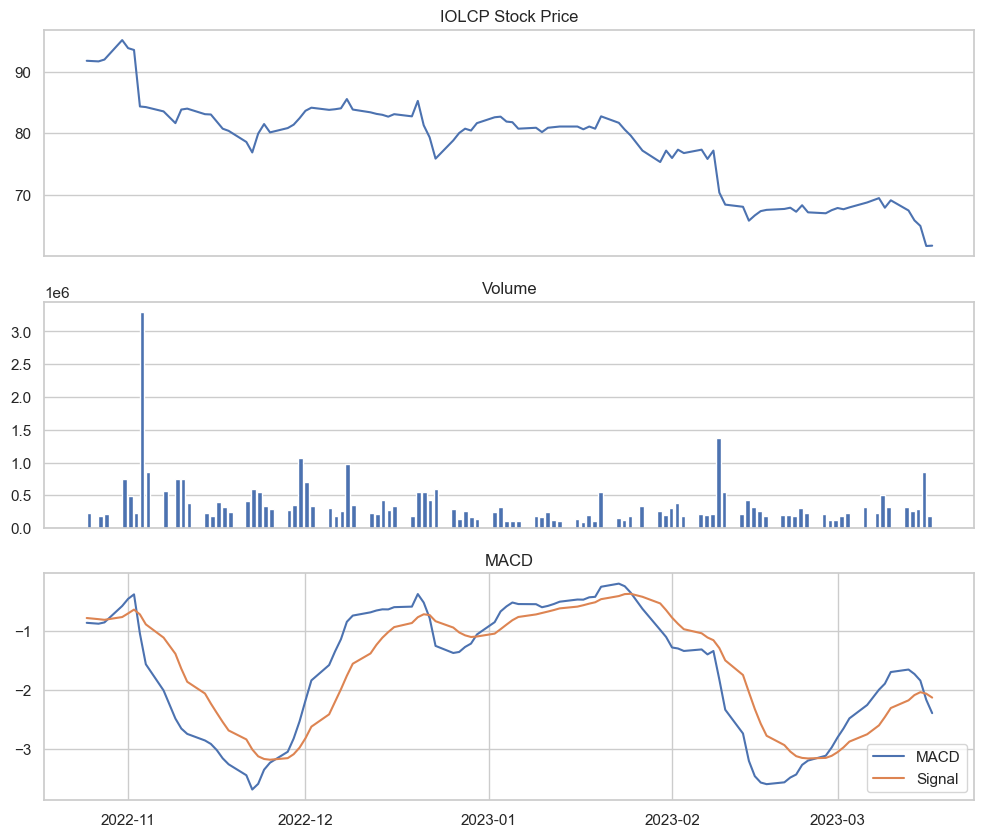

<AxesSubplot:title={'center':'Bollinger Band'}, xlabel='Date'>

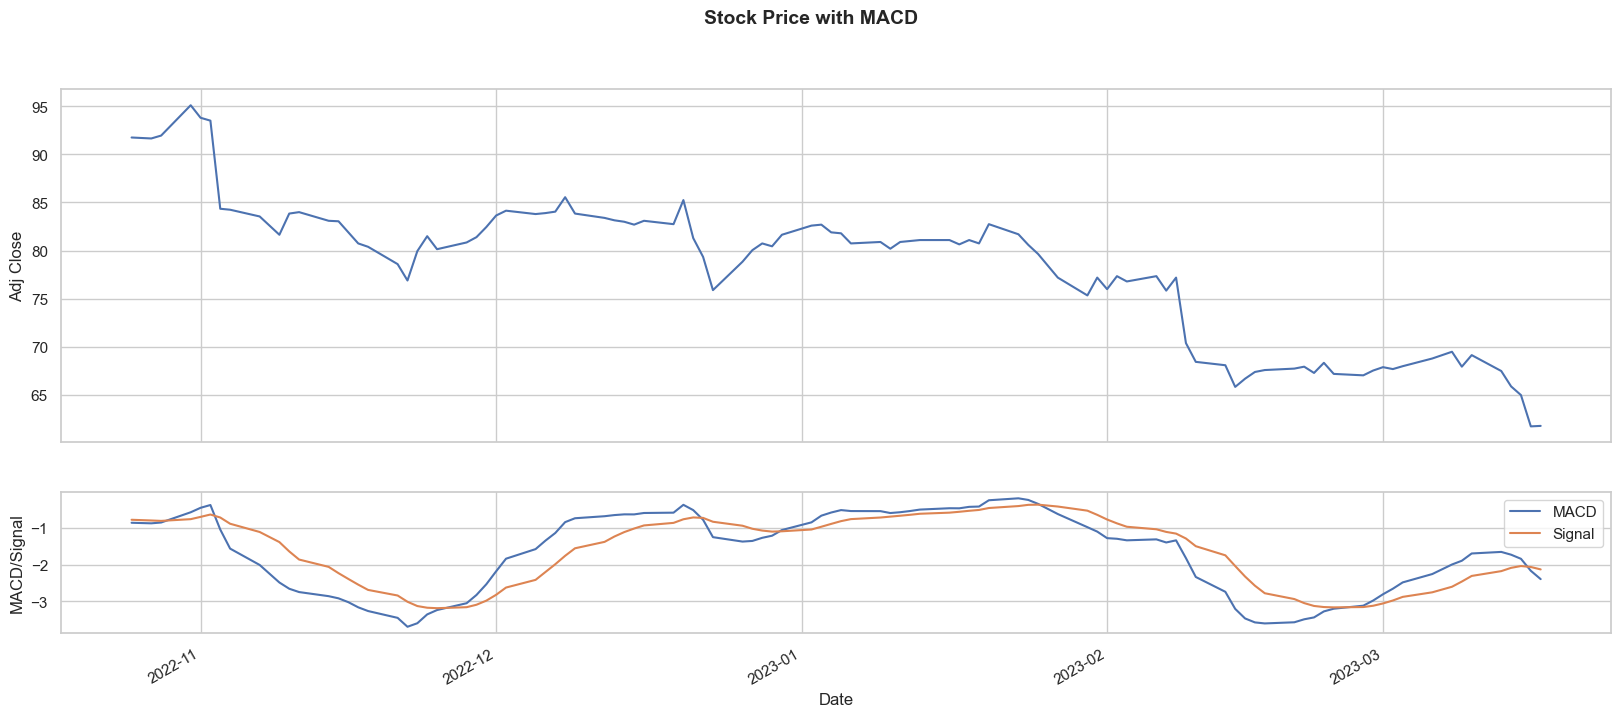

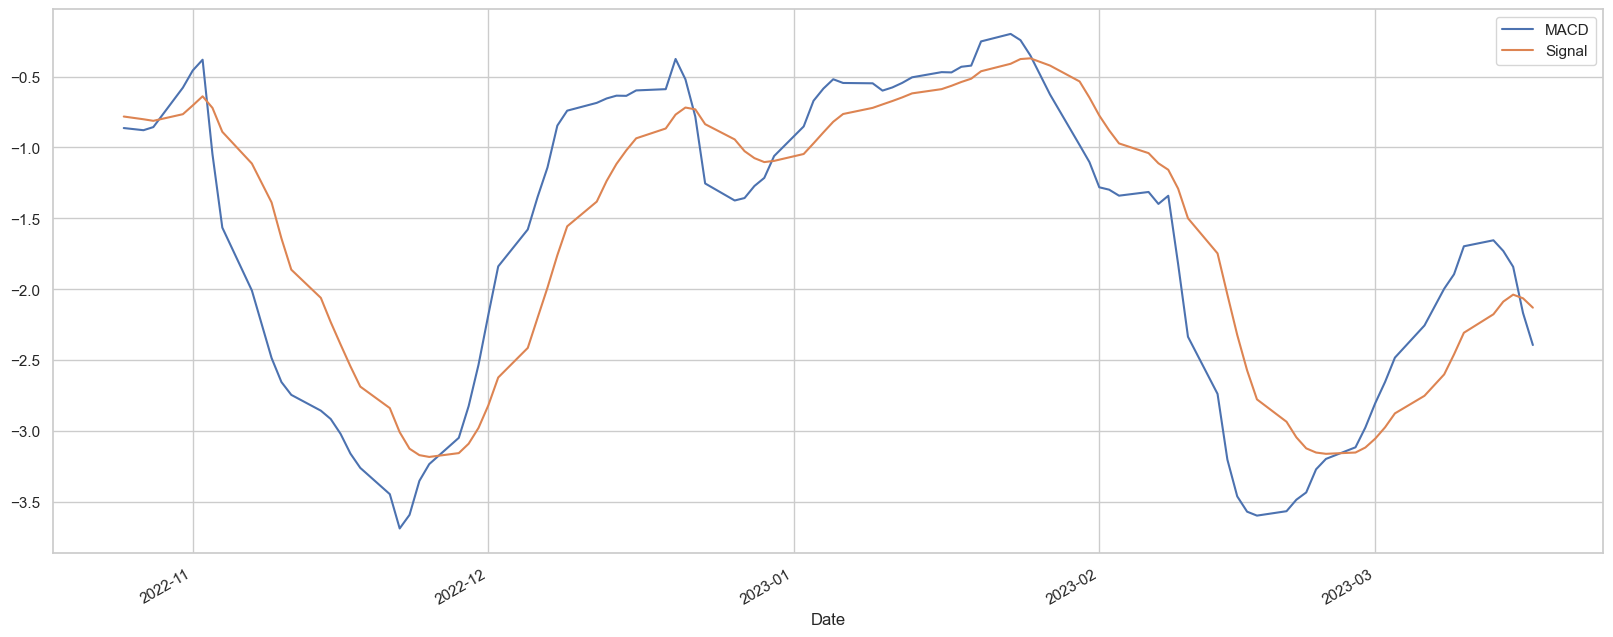

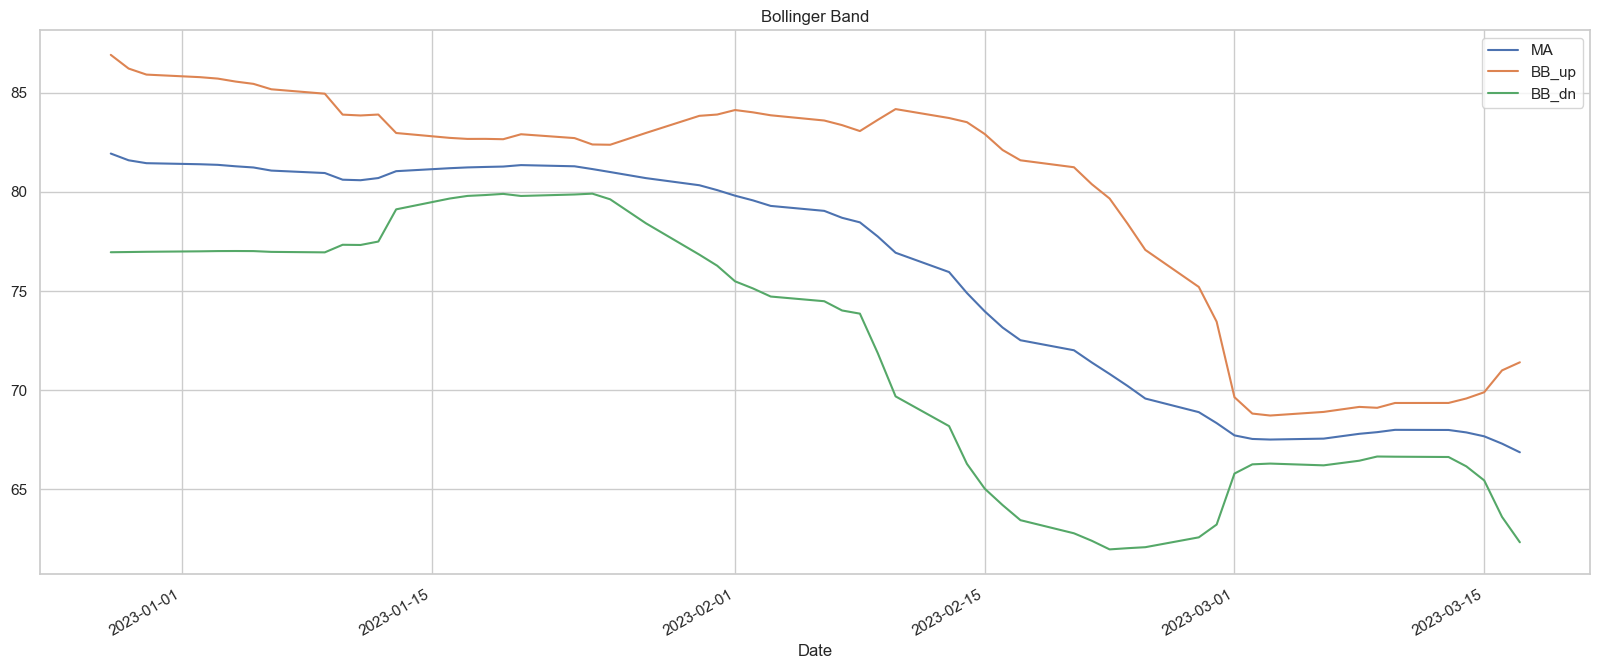

In [44]:
df = MACD(dft, 12, 26, 9)

plt.subplot(311)
plt.plot(df.iloc[-100:,4])
plt.title('IOLCP Stock Price')
plt.xticks([])

plt.subplot(312)
plt.bar(df.iloc[-100:,5].index, df.iloc[-100:,5].values)
plt.title('Volume')
plt.xticks([])

plt.subplot(313)
plt.plot(df.iloc[-100:,[-2,-1]])
plt.title('MACD')
plt.legend(('MACD','Signal'),loc='lower right')

plt.show()

fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(20, 8), gridspec_kw = {'height_ratios':[2.5, 1]})
df.iloc[-100:,4].plot(ax=ax0)
ax0.set(ylabel='Adj Close')

df.iloc[-100:,[-2,-1]].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='MACD/Signal')

# Title the figure
fig.suptitle('Stock Price with MACD', fontsize=14, fontweight='bold')
df[["MACD","Signal"]].tail(100).plot(figsize=(20,8))


ohlcv = df.tail(70)
# Visualizing Bollinger Band of the stocks for last 100 data points

BollBnd(ohlcv,15).iloc[-100:,[-4,-3,-2]].plot(title="Bollinger Band",figsize=(20,8))




<AxesSubplot:xlabel='Date'>

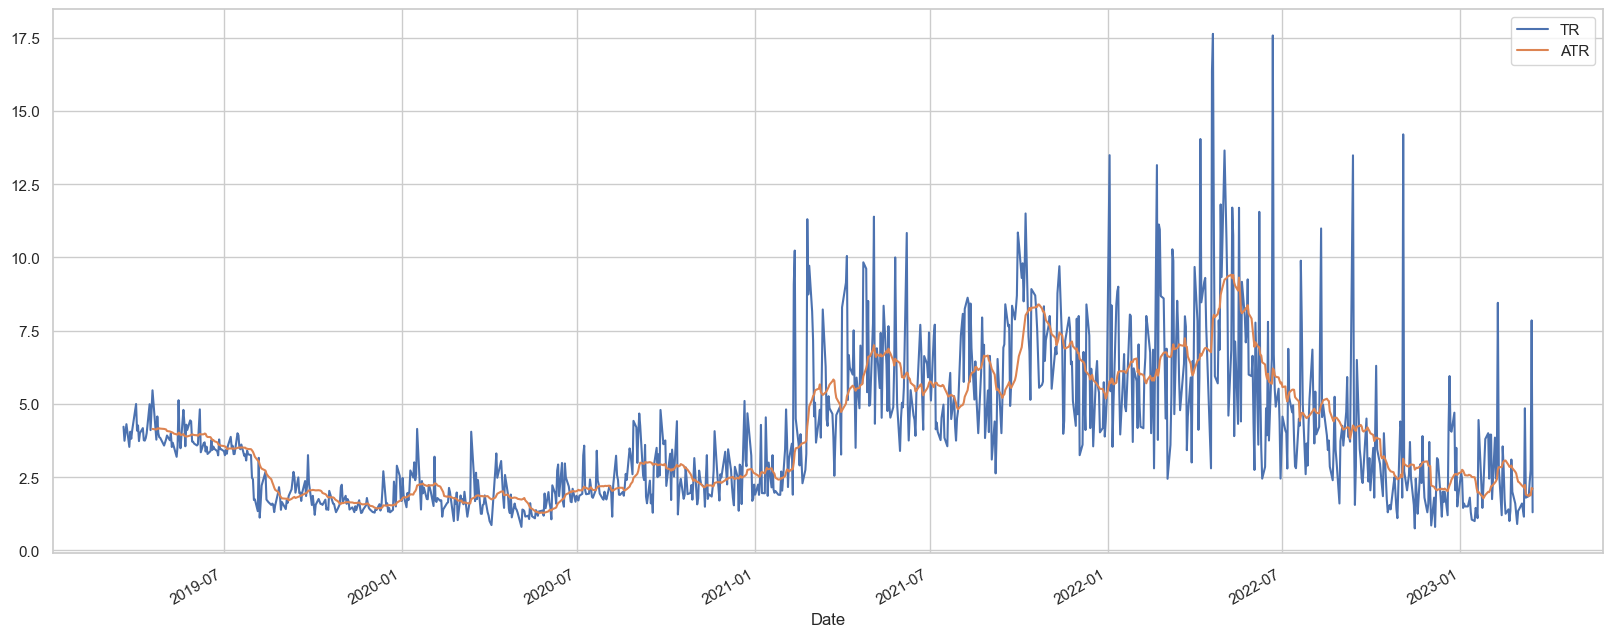

In [45]:
temp= ATR(dft,20)
temp[["TR","ATR"]].plot(figsize=(20,8))

<AxesSubplot:xlabel='Date'>

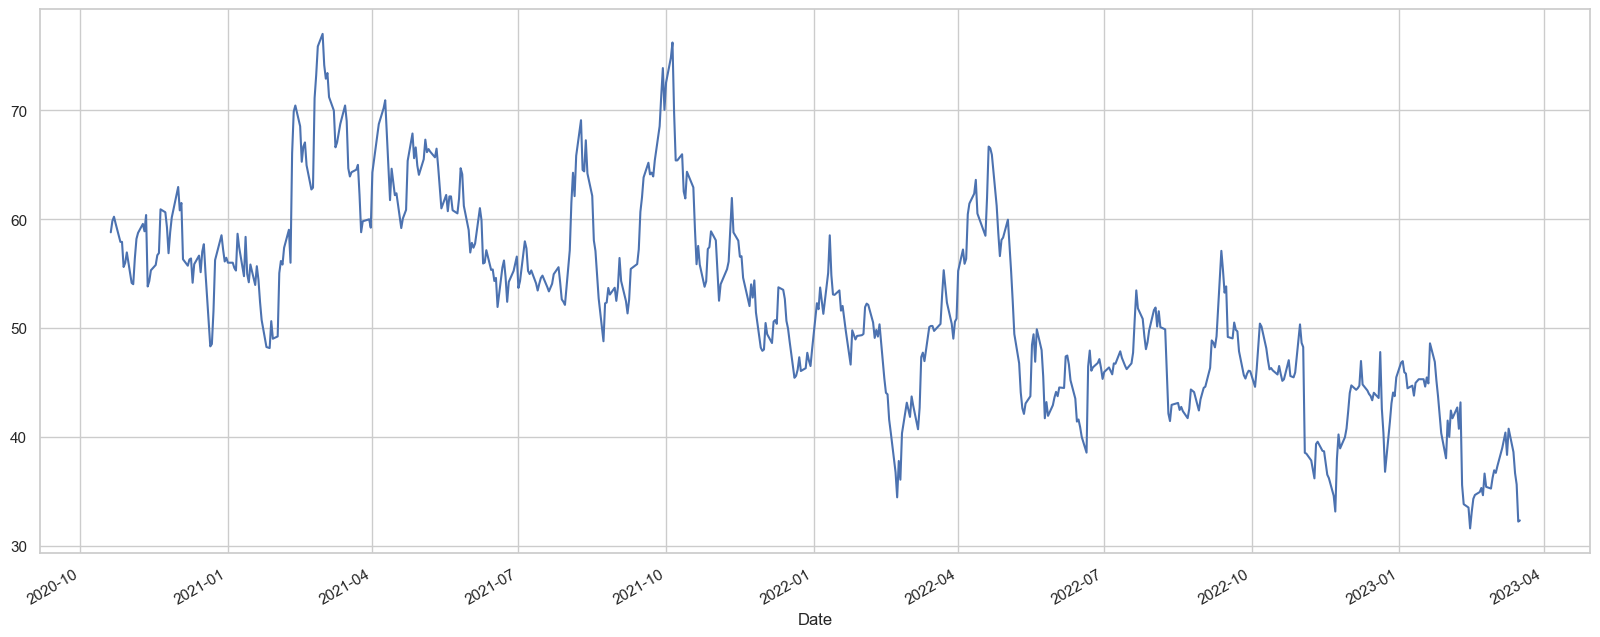

In [46]:
temp1 =RSI(df,30)
temp1.tail(600).plot(figsize=(20,8))

<AxesSubplot:xlabel='Date'>

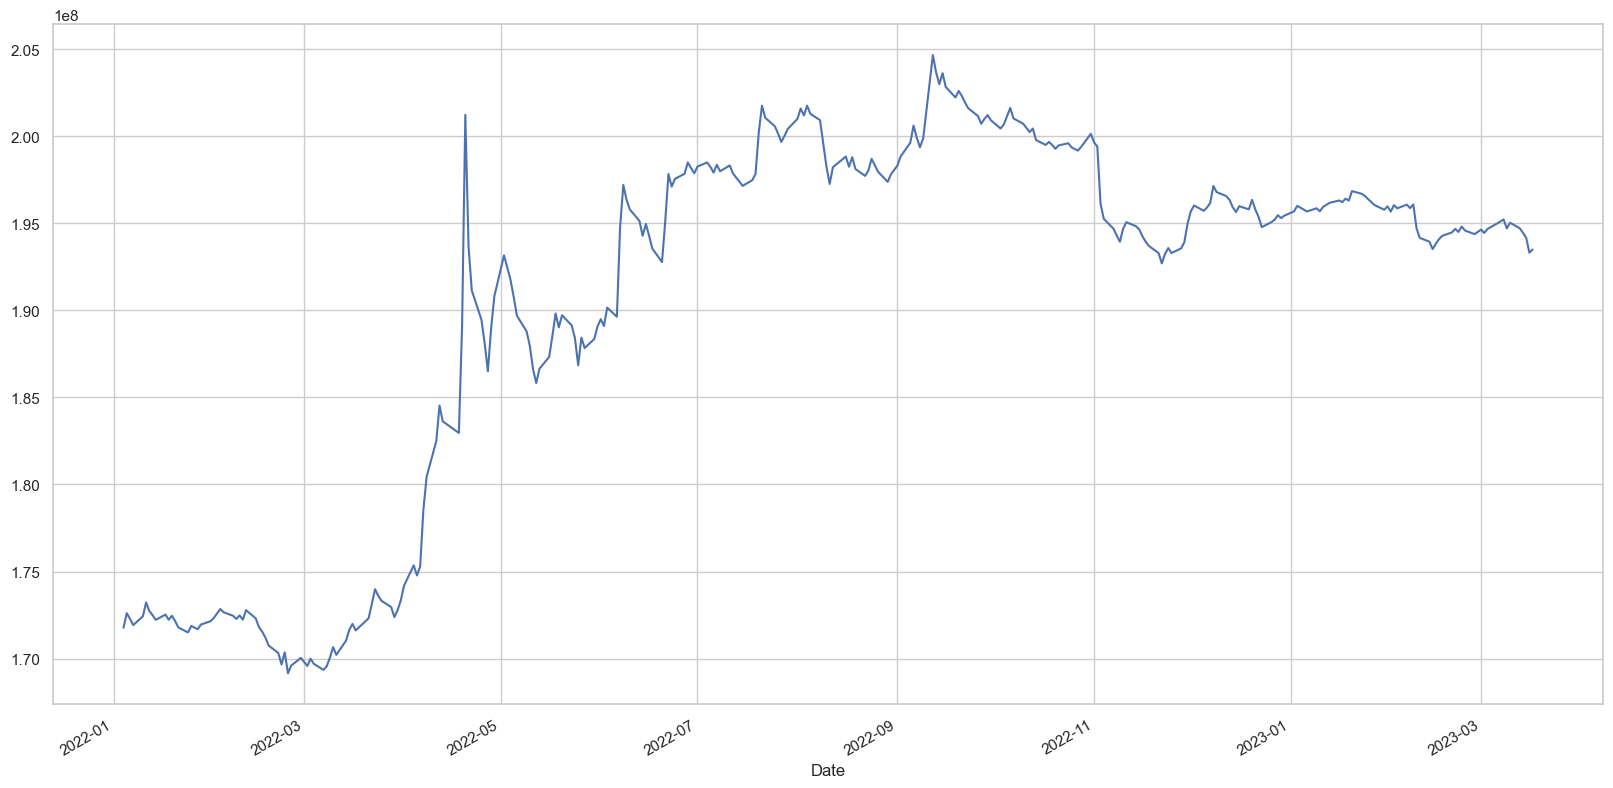

In [47]:
temp3 = OBV(df)
temp3.tail(300).plot(figsize=(20,10))

[]

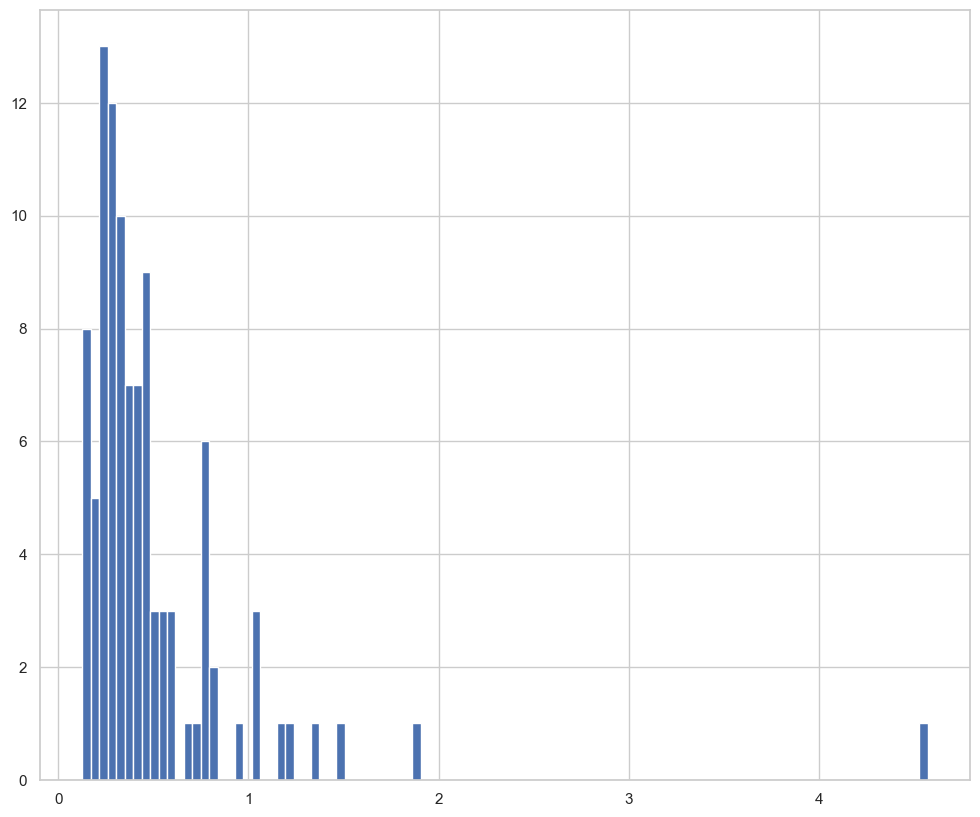

In [48]:
dft["Volume"].mean()
dft["RV"] = dft["Volume"]/(dft["Volume"].mean())
dft["RV"].tail(100).hist(bins=100).plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

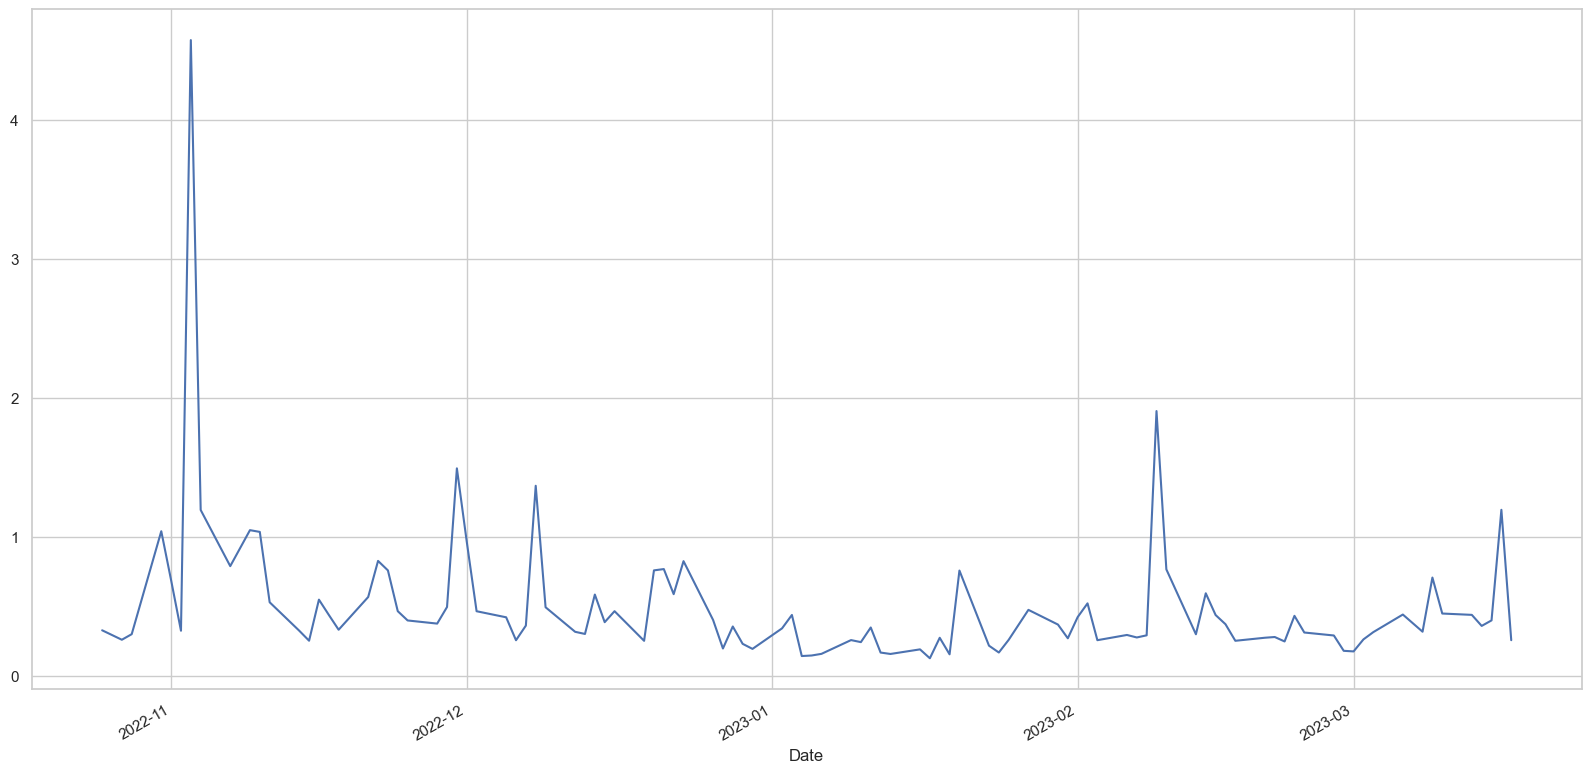

In [49]:
dft["RV"].tail(100).plot(figsize=(20,10))

In [50]:
import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web
from scipy.stats import norm


start = datetime.datetime(2017, 1, 1)


dfnew = yf.download(ticker,period="4y")
dfnew['5DMA'] = dfnew['Close'].rolling(window=5).mean()
dfnew['50DMA'] = dfnew['Close'].rolling(window=50).mean()
dfnew['200DMA'] = dfnew['Close'].rolling(window=200).mean()
dfnew['crit1'] = dfnew['Close'] >= dfnew['200DMA']
dfnew['cr12'] = (dfnew['50DMA']>= dfnew['200DMA']) |  dfnew['crit1'] == True
dfnew.tail(10)

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2023-03-03  68.400002  68.900002  67.500000  68.000000  68.000000  226510   
2023-03-06  68.000000  69.599998  68.000000  68.800003  68.800003  317591   
2023-03-08  69.449997  69.800003  68.650002  69.500000  69.500000  228758   
2023-03-09  70.250000  71.699997  66.849998  67.949997  67.949997  509164   
2023-03-10  67.550003  69.300003  67.500000  69.150002  69.150002  322852   
2023-03-13  68.949997  69.099998  67.300003  67.500000  67.500000  315906   
2023-03-14  67.900002  67.900002  65.550003  65.900002  65.900002  258744   
2023-03-15  66.449997  66.750000  64.000000  65.000000  65.000000  287334   
2023-03-16  69.400002  69.400002  61.549999  61.750000  61.750000  859952   
2023-03-17  62.099998  62.799999  61.500000  61.799999  61.799999  184781   

                 5DMA      50DMA    200DMA  crit1   cr12  
Date                                                      
2023-03-03  67.640001  75.627000  89.69775  False  False  
2023-03-06  67.990001  75.485000  89.49125  False  False  
2023-03-08  68.380000  75.298000  89.25950  False  False  
2023-03-09  68.389999  75.055999  89.03975  False  False  
2023-03-10  68.680000  74.823999  88.85250  False  False  
2023-03-13  68.580000  74.565000  88.70350  False  False  
2023-03-14  68.000000  74.250000  88.53250  False  False  
2023-03-15  67.100000  73.898000  88.37300  False  False  
2023-03-16  65.860001  73.479000  88.18825  False  False  
2023-03-17  64.390000  73.077000  87.99725  False  False

In [51]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import pandas_datareader.data as web
import datetime
import math

class ValueAtRiskMonteCarlo:
    
    def __init__(self, S, mu, sigma, c, n, iterations):
        self.S = S
        self.mu = mu
        self.sigma = sigma
        self.c = c
        self.n = n
        self.iterations = iterations 

    def simulation(self):
        stock_data = np.zeros([self.iterations, 1])	
        rand = np.random.normal(0, 1, [1, self.iterations])

        #equation for the S(t) stock price
        stock_price = self.S*np.exp(self.n*(self.mu - 0.5*self.sigma**2)+self.sigma*np.sqrt(self.n)*rand)
        #we have to sort the stock prices to determine the percentile
        stock_price = np.sort(stock_price)

        #it depends on the confidence level: 95% -> 5 and 99% -> 1
        percentile = np.percentile(stock_price,(1-self.c)*100)

        return self.S-percentile

if __name__ == "__main__":
    S = 150000    #this is the investment (stocks or whatever)
    c=0.95   #condifence level: this time it is 99%
    n = 365   #1 day 
    iterations = 100000  #number of paths in the Monte-Carlo simulation

    #historical data to approximate mean and standard deviation
    d = {}
    tickers = [ 'MANALIPETC.NS']
    #download stock related data from Yahoo Finance
    for t in tickers:
        citi = yf.download(t,period="4y")
           #we can use pct_change() to calculate daily returns
        citi['returns'] = citi['Adj Close'].pct_change()

    #we can assume daily returns to be normally sidtributed: mean and variance (standard deviation)
    #can describe the process
        mu = np.mean(citi['returns'])
        sigma = np.std(citi['returns'])

        model = ValueAtRiskMonteCarlo(S,mu,sigma,c,n,iterations)
        val = model.simulation()
        d[t] = val
        print("VALUE AT RSIK for {} is".format(t))
        print('Value at risk with Monte-Carlo simulation in INR: %0.2f' % val)
    print("The minimum value at risk for the portofolios are:")
    print(max(d.values()))
    l = int((val/S)*100)
    print("\n The loss incured by investing {} for {} days is: {} percent".format(S,n,l))

[*********************100%***********************]  1 of 1 completed
VALUE AT RSIK for MANALIPETC.NS is
Value at risk with Monte-Carlo simulation in INR: 74525.47
The minimum value at risk for the portofolios are:
74525.4663479957

 The loss incured by investing 150000 for 365 days is: 49 percent


[*********************100%***********************]  1 of 1 completed


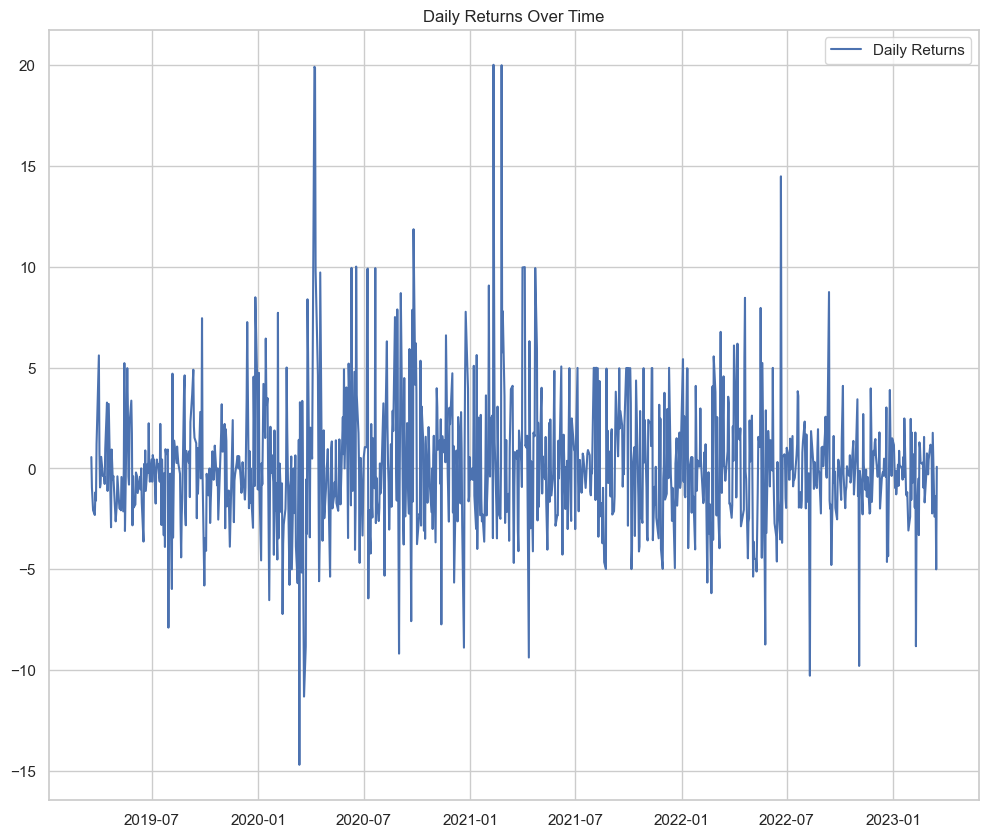

Daily volatility:  3.33%
Monthly volatility:  15.27%
Annual volatility:  52.90%
mu          0.040071
omega       0.350450
alpha[1]    0.073278
beta[1]     0.897228
Name: params, dtype: float64


                 h.1       h.2      h.3       h.4       h.5
Date                                                       
2023-03-17  6.940045  7.085802  7.22726  7.364546  7.497783


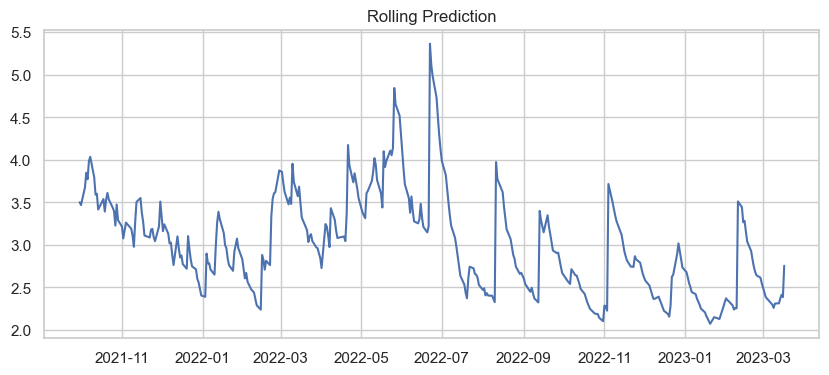

In [52]:


from arch import arch_model
#from arch.__future__ import reindexing
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web
from scipy.stats import norm
%matplotlib inline
start = datetime.datetime(2016, 1, 1)


ticker = 'MANALIPETC.NS'
stock_data = yf.download(ticker,period="4y")
stock_data['Return'] = 100 * (stock_data['Close'].pct_change())
stock_data.dropna(inplace=True)

fig = plt.figure()
fig.set_figwidth(12)
plt.plot(stock_data['Return'], label = 'Daily Returns')
plt.legend(loc='upper right')
plt.title('Daily Returns Over Time')
plt.show()
daily_volatility = stock_data['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

monthly_volatility = math.sqrt(21) * daily_volatility
print ('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

annual_volatility = math.sqrt(252) * daily_volatility
print ('Annual volatility: ', '{:.2f}%'.format(annual_volatility ))

garch_model = arch_model(stock_data['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')

gm_result = garch_model.fit(disp='off')
print(gm_result.params)

print('\n')

gm_forecast = gm_result.forecast(horizon = 5)
print(gm_forecast.variance[-1:])


rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = stock_data['Return'][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=stock_data['Return'].index[-365:])

plt.figure(figsize=(10,4))
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')
plt.show()

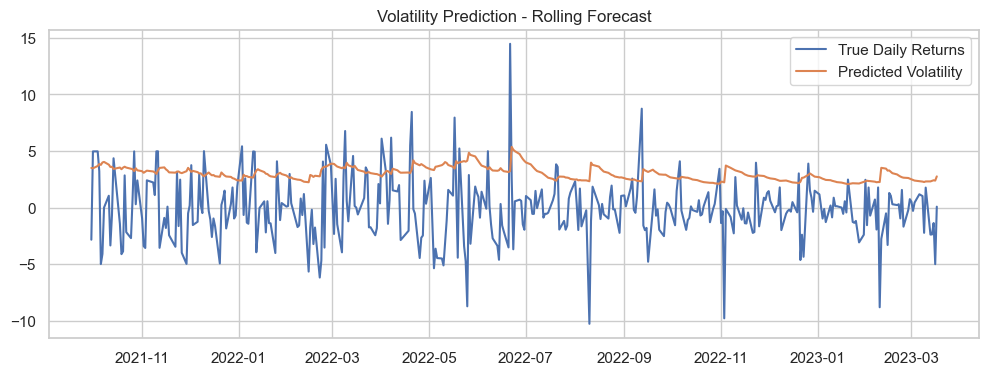

In [53]:

plt.figure(figsize=(12,4))
plt.plot(stock_data['Return'][-365:])
plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])
plt.show()

In [54]:
gm_forecast = gm_result.forecast(horizon = 30)
print(gm_forecast.variance[-1:])

                h.01      h.02     h.03      h.04      h.05      h.06  \
Date                                                                    
2023-03-17  6.940045  7.085802  7.22726  7.364546  7.497783  7.627089   

                h.07      h.08      h.09      h.10  ...      h.21      h.22  \
Date                                                ...                       
2023-03-17  7.752582  7.874374  7.992573  8.107287  ...  9.166391  9.246483   

                h.23     h.24      h.25      h.26      h.27      h.28  \
Date                                                                    
2023-03-17  9.324213  9.39965  9.472862  9.543915  9.612872  9.679796   

                h.29      h.30  
Date                            
2023-03-17  9.744745  9.807779  

[1 rows x 30 columns]


In [55]:
gm_forecast.variance[-1:]

h.01      h.02     h.03      h.04      h.05      h.06  \
Date                                                                    
2023-03-17  6.940045  7.085802  7.22726  7.364546  7.497783  7.627089   

                h.07      h.08      h.09      h.10  ...      h.21      h.22  \
Date                                                ...                       
2023-03-17  7.752582  7.874374  7.992573  8.107287  ...  9.166391  9.246483   

                h.23     h.24      h.25      h.26      h.27      h.28  \
Date                                                                    
2023-03-17  9.324213  9.39965  9.472862  9.543915  9.612872  9.679796   

                h.29      h.30  
Date                            
2023-03-17  9.744745  9.807779  

[1 rows x 30 columns]

In [56]:
import requests
from bs4 import BeautifulSoup

import requests
from bs4 import BeautifulSoup

url = "https://finance.yahoo.com/quote/AARTIIND.NS/key-statistics?p=MANALIPETC.NS"

headers = {
    "User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0"
}

soup = BeautifulSoup(requests.get(url, headers=headers).content, "html.parser")

for t in soup.select("table"):
    for tr in t.select("tr:has(td)"):
        for sup in tr.select("sup"):
            sup.extract()
        tds = [td.get_text(strip=True) for td in tr.select("td")]
        if len(tds) == 2:
            print("{:<50} {}".format(*tds))

Beta (5Y Monthly)                                  0.60
52-Week Change                                     -42.26%
S&P500 52-Week Change                              -12.80%
52 Week High                                       990.00
52 Week Low                                        510.05
50-Day Moving Average                              548.79
200-Day Moving Average                             690.19
Avg Vol (3 month)                                  643.48k
Avg Vol (10 day)                                   557.63k
Shares Outstanding                                 362.5M
Implied Shares Outstanding                         N/A
Float                                              199.21M
% Held by Insiders                                 44.98%
% Held by Institutions                             21.58%
Shares Short                                       N/A
Short Ratio                                        N/A
Short % of Float                                   N/A
Short % of Shares Outst

In [57]:
from datetime import datetime
import lxml
from lxml import html
import requests
import numpy as np
import pandas as pd

symbol = 'MANALIPETC.NS'

url = 'https://finance.yahoo.com/quote/' + symbol + '/balance-sheet?p=' + symbol

# Set up the request headers that we're going to use, to simulate
# a request by the Chrome browser. Simulating a request from a browser
# is generally good practice when building a scraper
headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'max-age=0',
    'Connection': 'close',
    'DNT': '1', # Do Not Track Request Header 
    'Pragma': 'no-cache',
    'Referrer': 'https://google.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36'
}

# Fetch the page that we're going to parse, using the request headers
# defined above
page = requests.get(url, headers=headers)

# Parse the page with LXML, so that we can start doing some XPATH queries
# to extract the data that we want
tree = html.fromstring(page.content)

# Smoke test that we fetched the page by fetching and displaying the H1 element
tree.xpath("//h1/text()")

table_rows = tree.xpath("//div[contains(@class, 'D(tbr)')]")

# Ensure that some table rows are found; if none are found, then it's possible
# that Yahoo Finance has changed their page layout, or have detected
# that you're scraping the page.
assert len(table_rows) > 0

parsed_rows = []

for table_row in table_rows:
    parsed_row = []
    el = table_row.xpath("./div")
    
    none_count = 0
    
    for rs in el:
        try:
            (text,) = rs.xpath('.//span/text()[1]')
            parsed_row.append(text)
        except ValueError:
            parsed_row.append(np.NaN)
            none_count += 1

    if (none_count < 4):
        parsed_rows.append(parsed_row)

df = pd.DataFrame(parsed_rows)
df

0           1          2          3  \
0                                 Breakdown   3/31/2022  3/31/2021  3/31/2020   
1                              Total Assets  12,901,307  8,865,234  6,603,230   
2   Total Liabilities Net Minority Interest   2,596,876  2,065,565  1,790,805   
3      Total Equity Gross Minority Interest  10,304,431  6,799,669  4,812,425   
4                      Total Capitalization  10,304,431  6,799,669  4,812,425   
5                       Common Stock Equity  10,304,431  6,799,669  4,812,425   
6                 Capital Lease Obligations     681,840    347,493    371,154   
7                       Net Tangible Assets   9,363,704  5,845,730  3,932,880   
8                           Working Capital   7,235,445  3,860,102  1,841,539   
9                          Invested Capital  10,491,133  6,942,505  5,068,882   
10                      Tangible Book Value   9,363,704  5,845,730  3,932,880   
11                               Total Debt     868,542    490,329    627,611   
12                             Share Issued     171,999    171,999    171,999   
13                   Ordinary Shares Number     171,999    171,999    171,999   

            4  
0   3/31/2019  
1   6,536,057  
2   1,986,324  
3   4,549,733  
4   4,549,733  
5   4,549,733  
6         NaN  
7   3,694,774  
8   1,729,310  
9   4,887,894  
10  3,694,774  
11    338,161  
12    171,999  
13    171,999

In [58]:

from datetime import datetime
import lxml
from lxml import html
import requests
import numpy as np
import pandas as pd

symbol = 'MANALIPETC.NS'

url = 'https://finance.yahoo.com/quote/'+symbol+'/financials?p='+symbol

# Set up the request headers that we're going to use, to simulate
# a request by the Chrome browser. Simulating a request from a browser
# is generally good practice when building a scraper
headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'max-age=0',
    'Connection': 'close',
    'DNT': '1', # Do Not Track Request Header 
    'Pragma': 'no-cache',
    'Referrer': 'https://google.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36'
}

# Fetch the page that we're going to parse, using the request headers
# defined above
page = requests.get(url, headers=headers)

# Parse the page with LXML, so that we can start doing some XPATH queries
# to extract the data that we want
tree = html.fromstring(page.content)

# Smoke test that we fetched the page by fetching and displaying the H1 element
tree.xpath("//h1/text()")

table_rows = tree.xpath("//div[contains(@class, 'D(tbr)')]")

# Ensure that some table rows are found; if none are found, then it's possible
# that Yahoo Finance has changed their page layout, or have detected
# that you're scraping the page.
assert len(table_rows) > 0

parsed_rows = []

for table_row in table_rows:
    parsed_row = []
    el = table_row.xpath("./div")
    
    none_count = 0
    
    for rs in el:
        try:
            (text,) = rs.xpath('.//span/text()[1]')
            parsed_row.append(text)
        except ValueError:
            parsed_row.append(np.NaN)
            none_count += 1

    if (none_count < 4):
        parsed_rows.append(parsed_row)

df = pd.DataFrame(parsed_rows)
df

0           1           2  \
0                                           Breakdown         ttm   3/31/2022   
1                                       Total Revenue  12,603,986  16,677,349   
2                                     Cost of Revenue   8,406,342   9,205,085   
3                                        Gross Profit   4,197,644   7,472,264   
4                                   Operating Expense   2,629,602   2,381,548   
5                                    Operating Income   1,568,042   5,090,716   
6           Net Non Operating Interest Income Expense      43,291      54,060   
7                                       Pretax Income   1,658,926   5,105,775   
8                                       Tax Provision     408,452   1,294,934   
9                      Net Income Common Stockholders   1,250,474   3,810,841   
10           Diluted NI Available to Com Stockholders   1,250,474   3,810,841   
11                               Basic Average Shares         NaN     171,999   
12                             Diluted Average Shares         NaN     171,999   
13                          Rent Expense Supplemental         NaN       2,079   
14                                     Total Expenses  11,035,944  11,586,633   
15  Net Income from Continuing & Discontinued Oper...   1,250,474   3,810,841   
16                                  Normalized Income   1,271,801   3,860,492   
17                                    Interest Income         NaN     147,207   
18                                   Interest Expense      95,254      84,485   
19                                Net Interest Income      43,291      54,060   
20                                               EBIT   1,754,180   5,190,260   
21                         Reconciled Cost of Revenue   8,406,342   9,205,085   
22                            Reconciled Depreciation     220,117     156,837   
23  Net Income from Continuing Operation Net Minor...   1,250,474   3,810,841   
24             Total Unusual Items Excluding Goodwill     -28,293     -66,530   
25                                Total Unusual Items     -28,293     -66,530   
26                                  Normalized EBITDA   2,002,590   5,457,465   
27                                 Tax Rate for Calcs           0           0   
28                        Tax Effect of Unusual Items      -6,966     -16,879   

             3          4          5  
0    3/31/2021  3/31/2020  3/31/2019  
1   10,178,870  8,005,996  8,080,627  
2    5,573,347  5,665,259  5,353,025  
3    4,605,523  2,340,737  2,727,602  
4    1,846,183  1,773,665  1,826,781  
5    2,759,340    567,072    900,821  
6       53,669       -169     -7,787  
7    2,678,430    542,109  1,134,963  
8      666,092     75,536    371,453  
9    2,012,338    466,573    763,510  
10   2,012,338    466,573    763,510  
11     171,999    171,999    171,999  
12     171,999    171,999    171,999  
13       7,314      9,098     16,786  
14   7,419,530  7,438,924  7,179,806  
15   2,012,338    466,573    763,510  
16   2,163,703    525,970    648,981  
17     100,724     62,438     15,460  
18       5,094     13,209      8,124  
19      53,669       -169     -7,787  
20   2,683,524    555,318  1,143,087  
21   5,573,347  5,665,259  5,353,025  
22     178,938    113,512    110,456  
23   2,012,338    466,573    763,510  
24    -202,305    -79,867    170,248  
25    -202,305    -79,867    170,248  
26   3,095,967    779,900  1,083,295  
27           0          0          0  
28     -50,940    -20,470     55,719

In [59]:

from datetime import datetime
import lxml
from lxml import html
import requests
import numpy as np
import pandas as pd

symbol = 'MANALIPETC.NS'

url = 'https://finance.yahoo.com/quote/'+symbol+'/cash-flow?p='+symbol

# Set up the request headers that we're going to use, to simulate
# a request by the Chrome browser. Simulating a request from a browser
# is generally good practice when building a scraper
headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'max-age=0',
    'Connection': 'close',
    'DNT': '1', # Do Not Track Request Header 
    'Pragma': 'no-cache',
    'Referrer': 'https://google.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36'
}

# Fetch the page that we're going to parse, using the request headers
# defined above
page = requests.get(url, headers=headers)

# Parse the page with LXML, so that we can start doing some XPATH queries
# to extract the data that we want
tree = html.fromstring(page.content)

# Smoke test that we fetched the page by fetching and displaying the H1 element
tree.xpath("//h1/text()")

table_rows = tree.xpath("//div[contains(@class, 'D(tbr)')]")

# Ensure that some table rows are found; if none are found, then it's possible
# that Yahoo Finance has changed their page layout, or have detected
# that you're scraping the page.
assert len(table_rows) > 0

parsed_rows = []

for table_row in table_rows:
    parsed_row = []
    el = table_row.xpath("./div")
    
    none_count = 0
    
    for rs in el:
        try:
            (text,) = rs.xpath('.//span/text()[1]')
            parsed_row.append(text)
        except ValueError:
            parsed_row.append(np.NaN)
            none_count += 1

    if (none_count < 4):
        parsed_rows.append(parsed_row)

df = pd.DataFrame(parsed_rows)
df

0    1          2          3          4          5
0            Breakdown  ttm  3/31/2022  3/31/2021  3/31/2020  3/31/2019
1  Operating Cash Flow  NaN  3,730,577  2,180,276    874,085    138,936
2  Investing Cash Flow  NaN   -131,195   -142,457   -205,994   -174,601
3  Financing Cash Flow  NaN   -261,455   -282,194   -288,450    -19,480
4    End Cash Position  NaN  6,122,359  2,815,556    952,086    543,123
5  Capital Expenditure  NaN   -272,159   -244,873   -293,669   -194,045
6       Free Cash Flow  NaN  3,458,418  1,935,403    580,416    -55,109

In [60]:
import yfinance as yf
gme = yf.Ticker(ticker)

gme.major_holders


0                                      1
0  52.04%        % of Shares Held by All Insider
1   0.83%       % of Shares Held by Institutions
2   1.72%        % of Float Held by Institutions
3       8  Number of Institutions Holding Shares

In [61]:

gme.institutional_holders





In [62]:
gme.info



{'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': ''}

In [63]:
gme.news

[{'uuid': 'a3df6914-af78-4f75-91df-a3dab1ad0167',
  'title': "Bandcamp's workers are forming a union",
  'publisher': 'Engadget',
  'link': 'https://finance.yahoo.com/m/a3df6914-af78-4f75-91df-a3dab1ad0167/bandcamp%27s-workers-are.html',
  'providerPublishTime': 1679039883,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/LZH5ztQTKWDyaagqPoK9gQ--~B/aD0zMjY1O3c9NDg5NzthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-uploaded-images/2023-03/1afc6970-c479-11ed-a7ff-5ee587c7d73d',
     'width': 4897,
     'height': 3265,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/NjzTINGtGtywm_slK5bQcA--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://s.yimg.com/os/creatr-uploaded-images/2023-03/1afc6970-c479-11ed-a7ff-5ee587c7d73d',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]}},
 {'uuid': '60362af6-4dd3-344b-8d2f-7433c8a019f0',
  'title': 'Belgium to become second EU country to recognize Buddh

In [64]:
gme.recommendations

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from GoogleNews import GoogleNews
from newspaper import Article
from newspaper import Config
from wordcloud import WordCloud, STOPWORDS

nltk.download('vader_lexicon') #required for Sentiment Analysis


now = dt.date.today()
now = now.strftime('%m-%d-%Y')
yesterday = dt.date.today() - dt.timedelta(days = 1)
yesterday = yesterday.strftime('%m-%d-%Y')

nltk.download('punkt')
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:78.0) Gecko/20100101 Firefox/78.0'
config = Config()
config.browser_user_agent = user_agent
config.request_timeout = 10
# save the company name in a variable
company_name = input("Please provide the name of the Company or a Ticker: ")
#As long as the company name is valid, not empty...
if company_name != '':
    print(f'Searching for and analyzing {company_name}, Please be patient, it might take a while...')

    #Extract News with Google News
    googlenews = GoogleNews(start='10/10/2021',end=now)
    googlenews.search(company_name)
    result = googlenews.result()
    #store the results
    df = pd.DataFrame(result)
    print(df)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sjacob/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sjacob/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Please provide the name of the Company or a Ticker: Manali Petrochemicals
Searching for and analyzing Manali Petrochemicals, Please be patient, it might take a while...
                                               title                    media  \
0   Manali Petrochemicals Q3 net plunges to ₹64 lakh                The Hindu   
1  Chennai-based Manali Petrochemicals acquires U...        Business Standard   
2  Manali Petrochemicals reports Q2 standalone ne...        Business Standard   
3  Manali Petrochemicals Limited recommends divid...          EquityBulls.com   
4  Manali Petrochemicals inks commercial agreemen...  Construction Week India   
5      Dolly Khanna picks stake in 2 smallcap stocks       The Economic Times   
6    Manali Petrochemicals reports ₹120-cr net in Q2  The Hindu Business Line   
7  Should You Buy Manali Petrochemicals Limited (...           Simply Wall St   
8  Manali Petrochemicals Ltd Q1FY23 consolidated ...          EquityBulls.com   
9  Manali Petrochemic

In [66]:
try:
    list =[] #creating an empty list 
    for i in df.index:
        dict = {} #creating an empty dictionary to append an article in every single iteration
        article = Article(df['link'][i],config=config) #providing the link
        try:
          article.download() #downloading the article 
          article.parse() #parsing the article
          article.nlp() #performing natural language processing (nlp)
        except:
           pass 
        #storing results in our empty dictionary
        dict['Date']=df['date'][i] 
        dict['Media']=df['media'][i]
        dict['Title']=article.title
        dict['Article']=article.text
        dict['Summary']=article.summary
        dict['Key_words']=article.keywords
        list.append(dict)
    check_empty = not any(list)
    # print(check_empty)
    if check_empty == False:
      news_df=pd.DataFrame(list) #creating dataframe
      print(news_df)

except Exception as e:
    #exception handling
    print("exception occurred:" + str(e))
    print('Looks like, there is some error in retrieving the data, Please try again or try with a different ticker.' )

          Date                    Media  \
0  1 month ago                The Hindu   
1  30-Nov-2022        Business Standard   
2   2-Nov-2022        Business Standard   
3   5-May-2022          EquityBulls.com   
4   9-Jul-2022  Construction Week India   
5  20-Jul-2022       The Economic Times   
6   9-Nov-2021  The Hindu Business Line   
7  1-Sept-2022           Simply Wall St   
8   9-Aug-2022          EquityBulls.com   
9   2-Nov-2022  The Hindu Business Line   

                                               Title  \
0   Manali Petrochemicals Q3 net plunges to ₹64 lakh   
1  Chennai-based Manali Petrochemicals acquires U...   
2  Manali Petrochemicals reports Q2 standalone ne...   
3  Manali Petrochemicals Limited recommends divid...   
4                                                      
5      Dolly Khanna picks stake in 2 smallcap stocks   
6    Manali Petrochemicals reports ₹120-cr net in Q2   
7  Should You Buy Manali Petrochemicals Limited (...   
8  Manali Petrochemica

Positive Sentiment: 8.00
Neutral Sentiment: 2.00
Negative Sentiment: 0.00


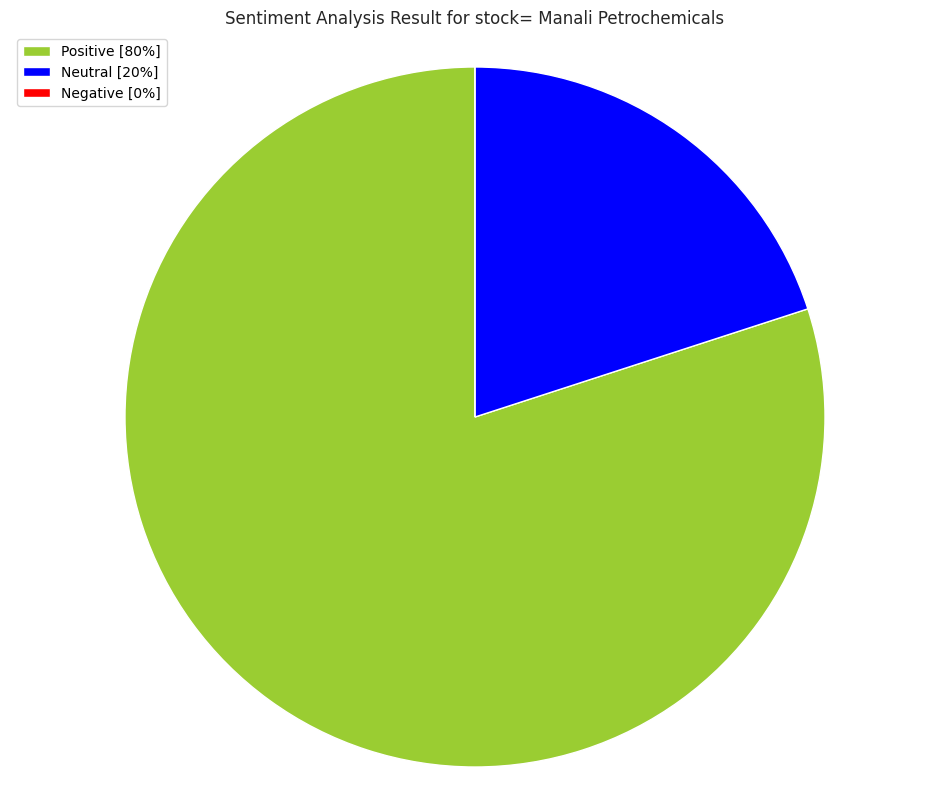

Wordcloud for Manali Petrochemicals


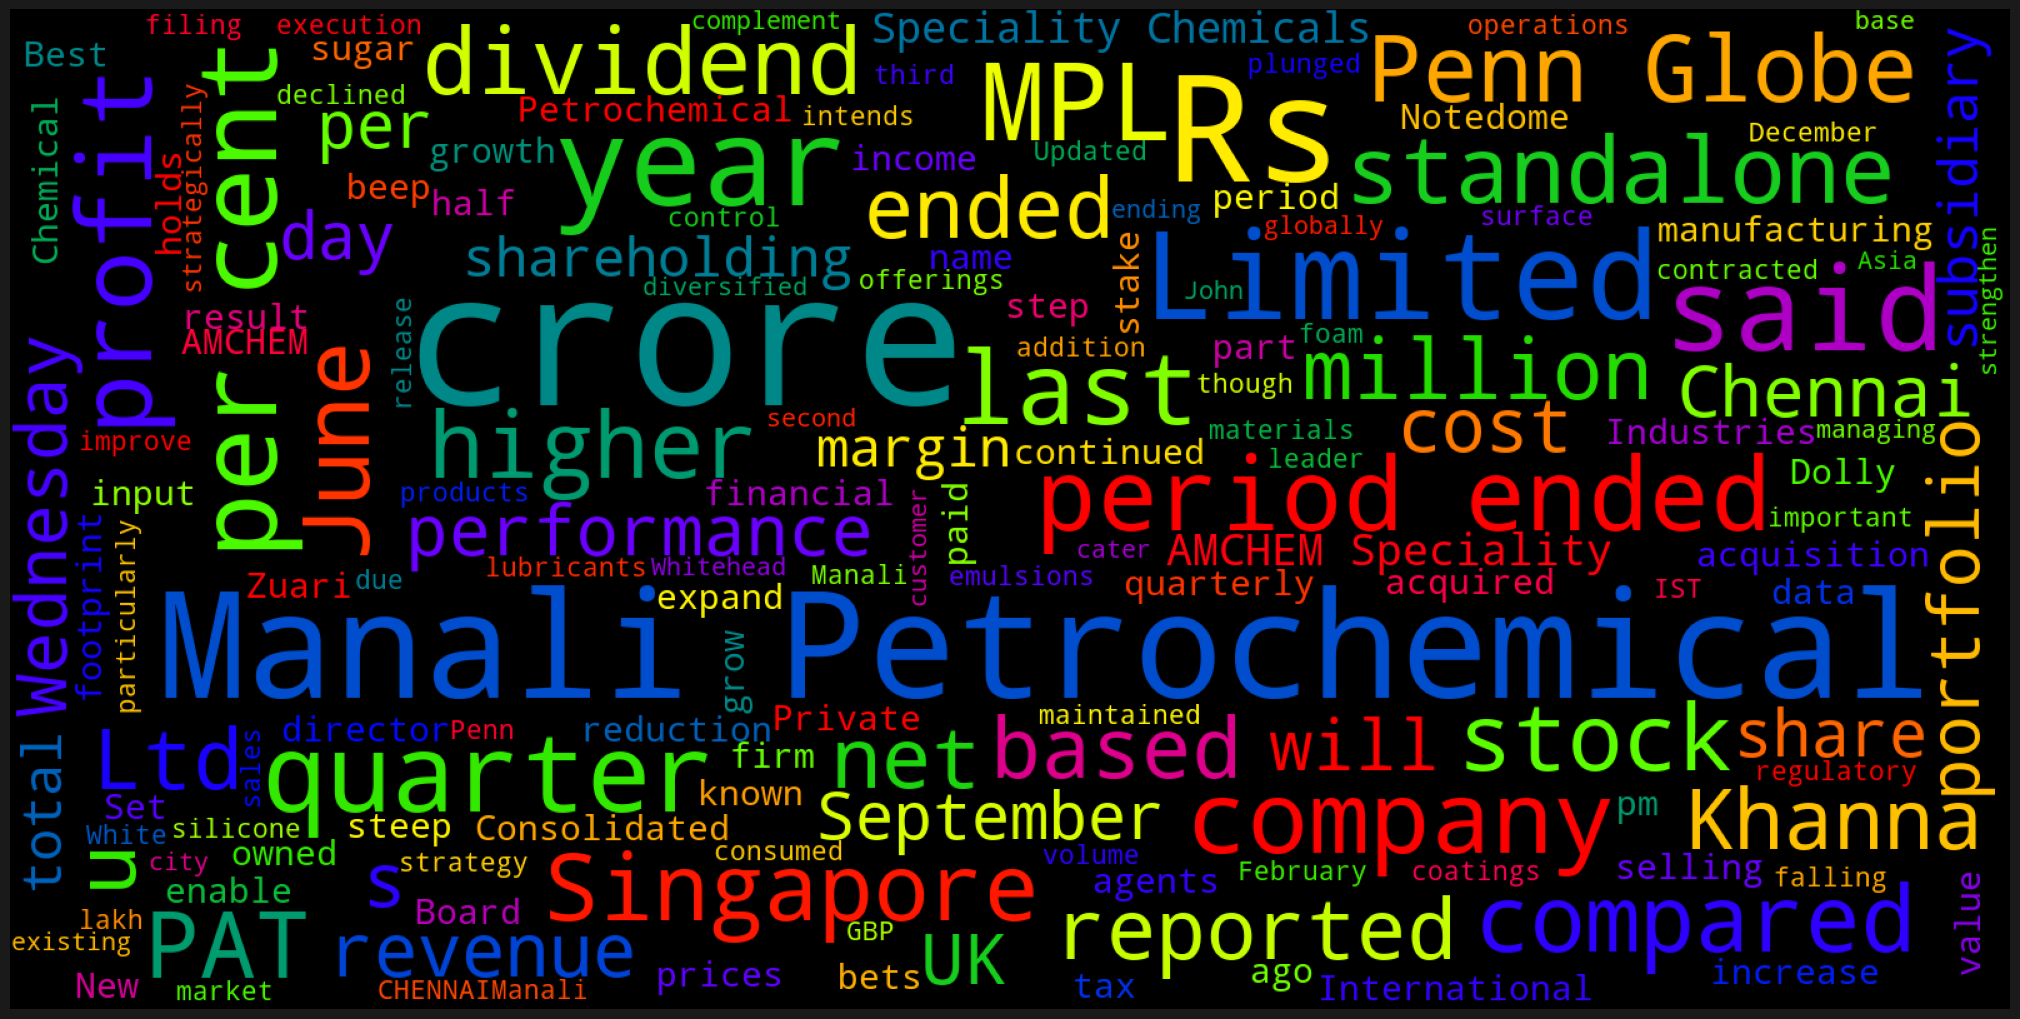

In [67]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Assigning Initial Values
positive = 0
negative = 0
neutral = 0
#Creating empty lists
news_list = []
neutral_list = []
negative_list = []
positive_list = []

#Iterating over the tweets in the dataframe
for news in news_df['Summary']:
    news_list.append(news)
    analyzer = SentimentIntensityAnalyzer().polarity_scores(news)
    neg = analyzer['neg']
    neu = analyzer['neu']
    pos = analyzer['pos']
    comp = analyzer['compound']

    if neg > pos:
        negative_list.append(news) #appending the news that satisfies this condition
        negative += 1 #increasing the count by 1
    elif pos > neg:
        positive_list.append(news) #appending the news that satisfies this condition
        positive += 1 #increasing the count by 1
    elif pos == neg:
        neutral_list.append(news) #appending the news that satisfies this condition
        neutral += 1 #increasing the count by 1 

positive = percentage(positive, len(news_df)) #percentage is the function defined above
negative = percentage(negative, len(news_df))
neutral = percentage(neutral, len(news_df))

#Converting lists to pandas dataframe
news_list = pd.DataFrame(news_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
#using len(length) function for counting
print("Positive Sentiment:", '%.2f' % len(positive_list), end='\n')
print("Neutral Sentiment:", '%.2f' % len(neutral_list), end='\n')
print("Negative Sentiment:", '%.2f' % len(negative_list), end='\n')

#Creating PieCart
labels = ['Positive ['+str(round(positive))+'%]' , 'Neutral ['+str(round(neutral))+'%]','Negative ['+str(round(negative))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for stock= "+company_name+"" )
plt.axis('equal')
plt.show()

# Word cloud visualization
def word_cloud(text):
    stopwords = set(STOPWORDS)
    allWords = ' '.join([nws for nws in text])
    wordCloud = WordCloud(background_color='black',width = 1600, height = 800,stopwords = stopwords,min_font_size = 20,max_font_size=150,colormap='prism').generate(allWords)
    fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    ax.axis("off")
    fig.tight_layout(pad=0)
    plt.show()

print('Wordcloud for ' + company_name)
word_cloud(news_df['Summary'].values)

In [68]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import datetime
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go
import streamlit as st
import datetime
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import yfinance as yf
import plotly.graph_objects as go
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import norm
import requests
from bs4 import BeautifulSoup
import cufflinks as cf

cf.go_offline()
from lxml import html
import requests
import numpy as np
import pandas as pd
import os
import talib
import datetime
import pandas as pd
import yfinance as yf

from arch import arch_model
#from arch.__future__ import reindexing
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt

import pandas_datareader
import datetime
import pandas_datareader.data as web
from scipy.stats import norm
import pandas_ta as ta
df = yf.download(ticker, period='4y')

fig = go.Figure(
    data=[go.Candlestick(
        x=df.index,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        #line=dict(width=1), opacity=1,
    increasing_fillcolor='#24A06B',
    decreasing_fillcolor="#CC2E3C",
    increasing_line_color='#2EC886',  
    decreasing_line_color='#FF3A4C'
    )]
)
fig.show()

[*********************100%***********************]  1 of 1 completed


In [69]:


patterns = {
    'CDL2CROWS': 'Two Crows',
    'CDL3BLACKCROWS': 'Three Black Crows',
    'CDL3INSIDE': 'Three Inside Up/Down',
    'CDL3LINESTRIKE': 'Three-Line Strike',
    'CDL3OUTSIDE': 'Three Outside Up/Down',
    'CDL3STARSINSOUTH': 'Three Stars In The South',
    'CDL3WHITESOLDIERS': 'Three Advancing White Soldiers',
    'CDLABANDONEDBABY': 'Abandoned Baby',
    'CDLADVANCEBLOCK': 'Advance Block',
    'CDLBELTHOLD': 'Belt-hold',
    'CDLBREAKAWAY': 'Breakaway',
    'CDLCLOSINGMARUBOZU': 'Closing Marubozu',
    'CDLCONCEALBABYSWALL': 'Concealing Baby Swallow',
    'CDLCOUNTERATTACK': 'Counterattack',
    'CDLDARKCLOUDCOVER': 'Dark Cloud Cover',
    'CDLDOJI': 'Doji',
    'CDLDOJISTAR': 'Doji Star',
    'CDLDRAGONFLYDOJI': 'Dragonfly Doji',
    'CDLENGULFING': 'Engulfing Pattern',
    'CDLEVENINGDOJISTAR': 'Evening Doji Star',
    'CDLEVENINGSTAR': 'Evening Star',
    'CDLGAPSIDESIDEWHITE': 'Up/Down-gap side-by-side white lines',
    'CDLGRAVESTONEDOJI': 'Gravestone Doji',
    'CDLHAMMER': 'Hammer',
    'CDLHANGINGMAN': 'Hanging Man',
    'CDLHARAMI': 'Harami Pattern',
    'CDLHARAMICROSS': 'Harami Cross Pattern',
    'CDLHIGHWAVE': 'High-Wave Candle',
    'CDLHIKKAKE': 'Hikkake Pattern',
    'CDLHIKKAKEMOD': 'Modified Hikkake Pattern',
    'CDLHOMINGPIGEON': 'Homing Pigeon',
    'CDLIDENTICAL3CROWS': 'Identical Three Crows',
    'CDLINNECK': 'In-Neck Pattern',
    'CDLINVERTEDHAMMER': 'Inverted Hammer',
    'CDLKICKING': 'Kicking',
    'CDLKICKINGBYLENGTH': 'Kicking - bull/bear determined by the longer marubozu',
    'CDLLADDERBOTTOM': 'Ladder Bottom',
    'CDLLONGLEGGEDDOJI': 'Long Legged Doji',
    'CDLLONGLINE': 'Long Line Candle',
    'CDLMARUBOZU': 'Marubozu',
    'CDLMATCHINGLOW': 'Matching Low',
    'CDLMATHOLD': 'Mat Hold',
    'CDLMORNINGDOJISTAR': 'Morning Doji Star',
    'CDLMORNINGSTAR': 'Morning Star',
    'CDLONNECK': 'On-Neck Pattern',
    'CDLPIERCING': 'Piercing Pattern',
    'CDLRICKSHAWMAN': 'Rickshaw Man',
    'CDLRISEFALL3METHODS': 'Rising/Falling Three Methods',
    'CDLSEPARATINGLINES': 'Separating Lines',
    'CDLSHOOTINGSTAR': 'Shooting Star',
    'CDLSHORTLINE': 'Short Line Candle',
    'CDLSPINNINGTOP': 'Spinning Top',
    'CDLSTALLEDPATTERN': 'Stalled Pattern',
    'CDLSTICKSANDWICH': 'Stick Sandwich',
    'CDLTAKURI': 'Takuri (Dragonfly Doji with very long lower shadow)',
    'CDLTASUKIGAP': 'Tasuki Gap',
    'CDLTHRUSTING': 'Thrusting Pattern',
    'CDLTRISTAR': 'Tristar Pattern',
    'CDLUNIQUE3RIVER': 'Unique 3 River',
    'CDLUPSIDEGAP2CROWS': 'Upside Gap Two Crows',
    'CDLXSIDEGAP3METHODS': 'Upside/Downside Gap Three Methods' }

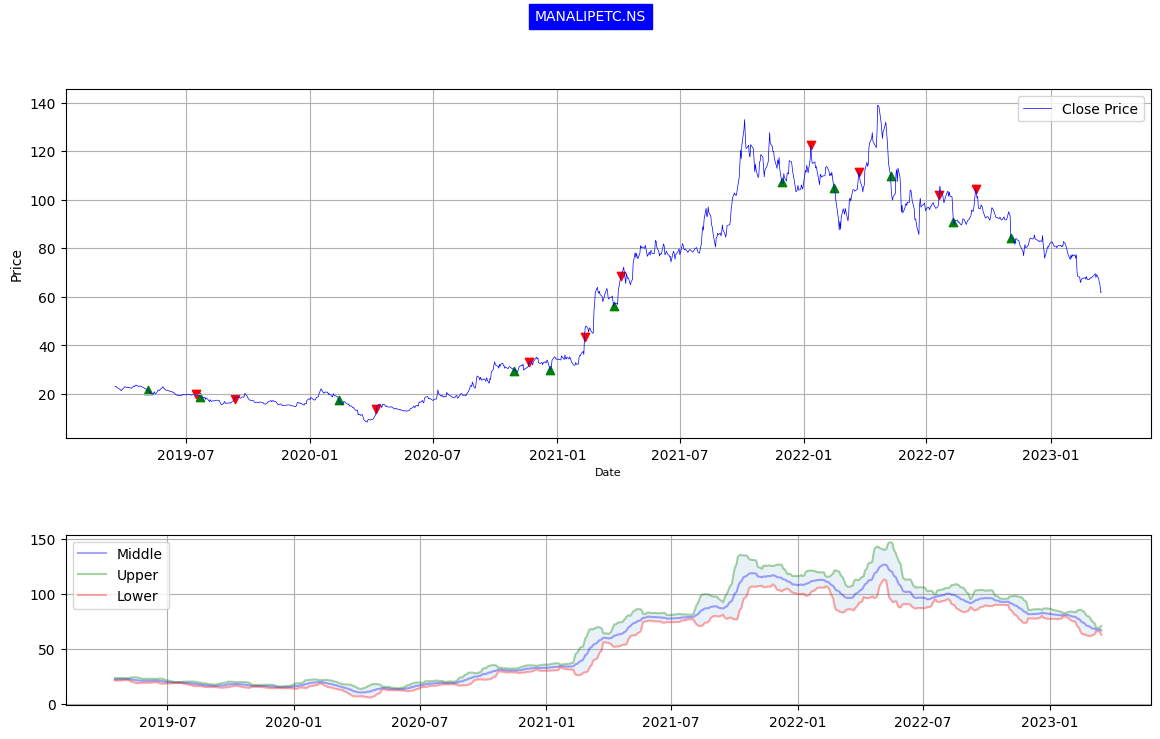

2023-03-17 13:31:26.302 
  command:

    streamlit run /Users/sjacob/Library/Python/3.9/lib/python/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [70]:
def bb_strategy(df):
    
    # variables
    
    bb_buy = []
    bb_sell = []
    position = False
    
    bb = ta.bbands(df['Adj Close'], length=20,std=2)
    
    df = pd.concat([df, bb], axis=1).reindex(df.index)

    for i in range(len(df)):
        
        # Buy Signal
        
        if df['Adj Close'][i] < df['BBL_20_2.0'][i]:
            if position == False :
                bb_buy.append(df['Adj Close'][i])
                bb_sell.append(np.nan)
                position = True
            else:
                bb_buy.append(np.nan)
                bb_sell.append(np.nan)
        
        # Sell Signal
        
        elif df['Adj Close'][i] > df['BBU_20_2.0'][i]:
            if position == True:
                bb_buy.append(np.nan)
                bb_sell.append(df['Adj Close'][i])
                position = False #To indicate that I actually went there
            else:
                bb_buy.append(np.nan)
                bb_sell.append(np.nan)
        else :
            bb_buy.append(np.nan)
            bb_sell.append(np.nan)

    df['bb_buy_signal_price'] = bb_buy
    df['bb_sell_signal_price'] = bb_sell

    return df
df = bb_strategy(df)
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(ticker, fontsize=10, backgroundcolor='blue', color='white')

ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price')
ax1.plot(df['Adj Close'],label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(df.index, df['bb_buy_signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(df.index, df['bb_sell_signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.plot(df['BBM_20_2.0'], label='Middle', color='blue', alpha=0.35) #middle band
ax2.plot(df['BBU_20_2.0'], label='Upper', color='green', alpha=0.35) #Upper band
ax2.plot(df['BBL_20_2.0'], label='Lower', color='red', alpha=0.35) #lower band
ax2.fill_between(df.index, df['BBL_20_2.0'], df['BBU_20_2.0'], alpha=0.1)
ax2.legend(loc='upper left')
ax2.grid()
plt.show()
st.header("Bolliger Band Strategy")
st.pyplot(fig)

def candle_trend(df, patterns):
    data = pd.DataFrame(columns=['Candle-Pattern', 'Definition', 'Signal'])
    for pattern in patterns:

        ta_function = getattr(talib, pattern)
        result = ta_function(df['Open'], df['High'], df['Low'], df['Close'])

        last_pattern = result.tail(1).values[0]

        if last_pattern > 0:
            data = data.append(pd.Series([pattern, patterns[pattern], "BULL"], index=data.columns), ignore_index=True)


        elif last_pattern < 0:
            data = data.append(pd.Series([pattern, patterns[pattern], "BEAR"], index=data.columns), ignore_index=True)

    return data


In [71]:
candle_trend(df, patterns)

Candle-Pattern            Definition Signal
0            CDLDOJI                  Doji   BULL
1          CDLHARAMI        Harami Pattern   BULL
2     CDLHARAMICROSS  Harami Cross Pattern   BULL
3        CDLHIGHWAVE      High-Wave Candle   BEAR
4    CDLHOMINGPIGEON         Homing Pigeon   BULL
5  CDLLONGLEGGEDDOJI      Long Legged Doji   BULL
6     CDLRICKSHAWMAN          Rickshaw Man   BULL
7     CDLSPINNINGTOP          Spinning Top   BEAR

In [72]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# This relates to plotting datetime values with matplotlib:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import yfinance as yf

In [73]:
df = yf.download(ticker, period='3y')
df.tail()

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2023-03-13  68.949997  69.099998  67.300003  67.500000  67.500000  315906
2023-03-14  67.900002  67.900002  65.550003  65.900002  65.900002  258744
2023-03-15  66.449997  66.750000  64.000000  65.000000  65.000000  287334
2023-03-16  69.400002  69.400002  61.549999  61.750000  61.750000  859952
2023-03-17  62.099998  62.799999  61.500000  61.950001  61.950001  184603

In [74]:
df.reset_index(inplace=True)

df['Date'] = df['Date'].dt.strftime('%Y/%m/%d')
df['Date'] = pd.to_datetime(df['Date'])
df1 = df.drop(columns=['High', 'Low','Open', 'Close','Volume'])
df1.head()

Date  Adj Close
0 2020-03-17  11.491103
1 2020-03-18  11.491103
2 2020-03-19  10.700217
3 2020-03-20   9.490626
4 2020-03-23   8.653218

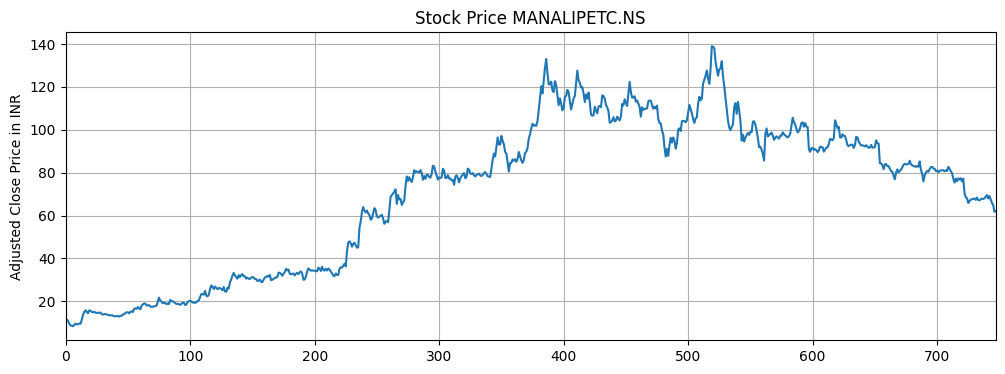

In [75]:
plt.figure(figsize=(12,4))
plt.title('Stock Price '+ticker)
plt.ylabel('Adjusted Close Price in INR')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['Adj Close'])
plt.show()

In [76]:
y = df1['Adj Close'].values.astype(float)

# Define a test size
test_size = 12

# Create train and test sets
train_set = y[:-test_size]
test_set = y[-test_size:]

from sklearn.preprocessing import MinMaxScaler

# Instantiate a scaler with a feature range from -1 to 1
scaler = MinMaxScaler(feature_range=(-1, 1))

train_norm = scaler.fit_transform(train_set.reshape(-1, 1))

# Convert train_norm from an array to a tensor
train_norm = torch.FloatTensor(train_norm).view(-1)

# Define a window size
window_size = 12

# Define function to create seq/label tuples
def input_data(seq,ws):  # ws is the window size
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

# Apply the input_data function to train_norm
train_data = input_data(train_norm,window_size)
len(train_data)  # this should equal 325-12-12


class LSTMnetwork(nn.Module):
    def __init__(self,input_size=1,hidden_size=100,output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,output_size)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,self.hidden_size),
                       torch.zeros(1,1,self.hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]  # we only want the last value
    
torch.manual_seed(101)
model = LSTMnetwork()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 1000

# set model to back to training mode
model.train()

# feature scale the entire dataset
y_norm = scaler.fit_transform(y.reshape(-1, 1))
y_norm = torch.FloatTensor(y_norm).view(-1)
all_data = input_data(y_norm,window_size)

import time
start_time = time.time()

for epoch in range(epochs):
    
    # train on the full set of sequences
    for seq, y_train in all_data:  
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
window_size = 12
future = 30
L = len(y)

preds = y_norm[-window_size:].tolist()

model.eval()
for i in range(future):  
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        # Reset the hidden parameters here!
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))  
        preds.append(model(seq).item())

# Inverse-normalize the prediction set
true_predictions = scaler.inverse_transform(np.array(preds).reshape(-1, 1))
true_predictions

array([[67.9000013 ],
       [67.69999717],
       [68.0000002 ],
       [68.80000308],
       [69.50000024],
       [67.94999685],
       [69.15000166],
       [67.49999986],
       [65.9000014 ],
       [65.0000001 ],
       [61.75000033],
       [61.95000105],
       [61.98101257],
       [62.45688397],
       [62.63538149],
       [61.72706747],
       [60.74527371],
       [59.86935805],
       [58.73117046],
       [57.712449  ],
       [57.77919798],
       [58.40456312],
       [58.12730366],
       [57.64665182],
       [58.73564141],
       [60.01547084],
       [59.45088303],
       [59.38664495],
       [59.96971607],
       [59.96311961],
       [58.51949991],
       [57.24735207],
       [57.06627164],
       [56.45595242],
       [55.28377234],
       [56.26027375],
       [58.60218627],
       [58.63640843],
       [58.01410503],
       [60.1883276 ],
       [62.83011224],
       [62.22667755]])

[*********************100%***********************]  1 of 1 completed


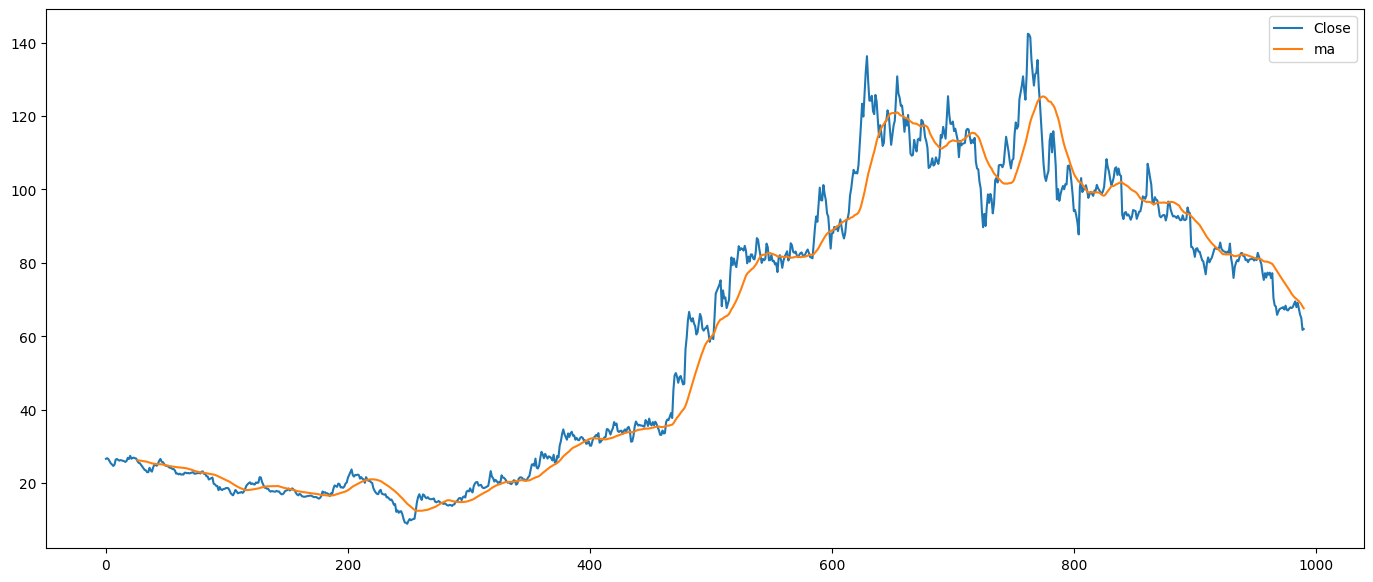

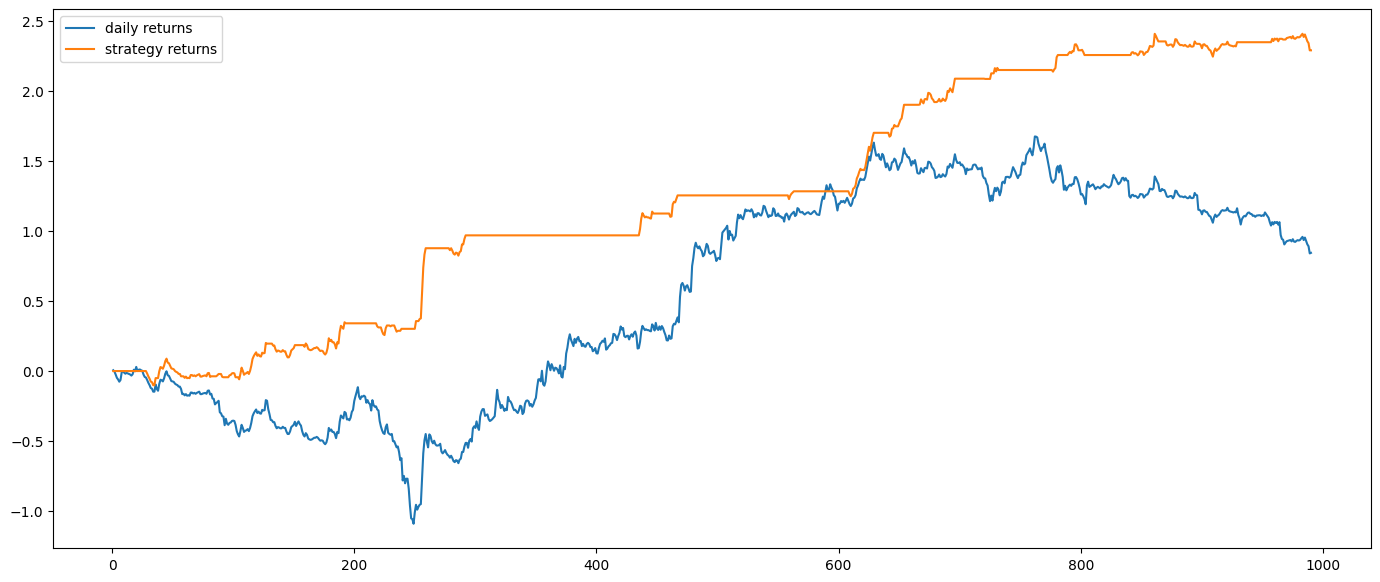

Trading Days  991


In [77]:
data = yf.download(ticker,period="4y")
moving_average_window = 27
# creating ** moving average
data["ma"] = data["Close"].rolling(window=moving_average_window).mean()
# calculate daily returns 
data["daily returns"] = np.log(data["Close"] / data["Close"].shift(1))
data["position"] = [0] * len(data)
data.reset_index(inplace=True)
pos_exit = False
pos = "N"
# calcualte standard deviations
std = round(data["daily returns"].std(),4)
mean = round(data["daily returns"].mean(),4)
# Event driven testing
for i in range(1, len(data)):
  
    # Signal to GO SHORT and reset position
    if pos_exit:
        pos_exit = False
        pos = "N"
        continue
        
    # GO LONG, if return goes beyond lower bound 
    
    # (1 standard deviation). The asumption here is 
    # that the stock will revert back to its mean value
    
    if data["Close"][i] < ((1 - std) * data["ma"][i]):
        data.at[i, "position"] = 1
        pos = "L"

    # scenario if return in between lower and upper bounds
    
    if pos == "L":
        data.at[i, "position"] = 1
        
    # updating strategy returns
    
    data["strategy returns"] = data["daily returns"] \
    * data["position"]

    # exiting if the strategy return drops by 3%
    if data["strategy returns"][i] < -0.03:
        data.at[i, "position"] = 0
        pos_exit = True 
        
data["position"].shift(1)
# plotting
data[["Close","ma"]].plot(figsize = (17,7))
data[["daily returns", "strategy returns"]].cumsum().plot(figsize = (17,7))
plt.show()

print("Trading Days ",len(data))


In [78]:
data["daily returns"].cumsum()[-1:]*100

990    84.434525
Name: daily returns, dtype: float64

In [79]:
data["strategy returns"].cumsum()[-1:]*100

990    229.120841
Name: strategy returns, dtype: float64

In [80]:
import pandas as pd
import yfinance as yf
df = yf.download("MANALIPETC.NS",period="4y")
df.reset_index(inplace=True)

df['Date'] = df['Date'].dt.strftime('%Y/%m/%d')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2019-03-18  27.250000  27.700001  26.500000  26.650000  23.029308  538790
2019-03-19  27.150000  27.250000  26.500000  26.799999  23.158928  160740
2019-03-20  26.700001  26.900000  26.450001  26.549999  22.942890  138569
2019-03-22  26.850000  27.250000  25.900000  26.000000  22.467615  311891
2019-03-25  25.850000  26.000000  25.250000  25.400000  21.949133  150886

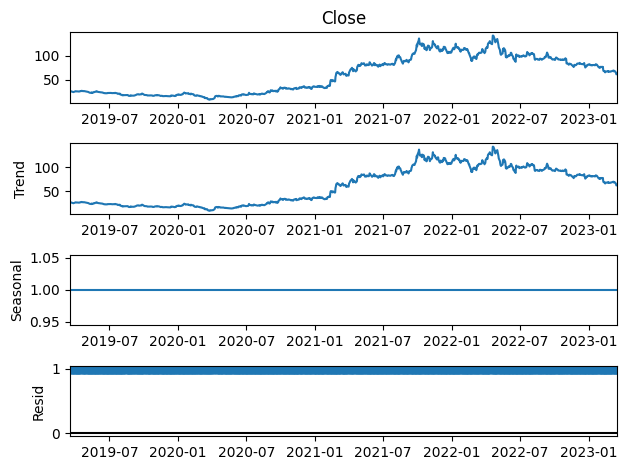

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='multiplicative',extrapolate_trend='freq', period=1)  # model='mul' also works
result.plot();